<a href="https://colab.research.google.com/github/med-tz/elelction_Tunisie/blob/master/Copie_de_Source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**chargement de tous les packages nécessaires**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.model_selection import train_test_split
from pprint import pprint
from time import time
import logging
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

In [17]:
## Affichage de plus de lignes pour les output
pd.options.display.max_rows = 500
import warnings
warnings.filterwarnings("ignore")#ignore warnings

**chargement de la base de donnee**

In [18]:
drive.mount('/content/drive')
Base=pd.read_excel('/content/drive/MyDrive/stat up/Base.xlsx')
Base2=pd.read_excel('/content/drive/MyDrive/stat up/Base2.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Beginning

In [ ]:
Base.head(10)

,ID,BID,Kish1,Q1,Q2,Q3,Secteur,Block,Q4,Q5,Q6,Q7,Q8,Q8_AUTRES,Q9,Q9_AUTRES,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q19BIS,Q20,Q20BIS,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22_1,...,Q22_9,Q23,Q25,Q26,Q27,Q28A,Q28B,Q30,Q31,Q32_1,Q32_2,Q32_3,Q34_A,Q34_B,Q34_C,Q34_D,Q34_E,Q34_F,Q34_G,Q34_H,Q34_I,Q34_J,Q34_K,Q35_A,Q35_B,Q35_C,Q35_D,Q35_E,Q35_F,Q35_G,Q35_H,Q52,Q53,Q54,Q55,Pondération1,Pondération2,Pondération3,PoidsInitial,Poids
0,1,1,1,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,27,NaN,1,3.0,NaN,NaN,NaN,3.0,2,1,NaN,1,1,1,4,4,98,NaN,2,2.0,3,1,3,2,2,2,3,2,2,3,2,...,2,1,2.0,2.0,2.0,4,5.0,6,2,3,6.0,5.0,3,2,3,3,2,2,3,2,2,3,4,2,4,3,2,3,5,2,2,10,1,3,1,1.693877,1.123561,1.033677,478.352606,602.470102
1,2,1,2,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,37,NaN,2,NaN,NaN,4.0,NaN,NaN,2,2,4.0,1,1,1,4,4,1,2.0,8,2.0,2,3,3,2,3,3,3,2,3,3,2,...,2,1,NaN,NaN,NaN,5,1.0,1,1,3,6.0,4.0,3,3,3,4,2,2,3,2,2,3,4,2,3,3,3,3,3,3,2,4,2,4,3,0.853806,0.645277,0.636774,956.705212,995.519830
2,3,1,2,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,22,NaN,1,2.0,NaN,NaN,NaN,3.0,1,2,4.0,1,1,98,4,3,98,NaN,96,2.0,3,3,99,3,99,99,3,3,99,99,3,...,3,1,NaN,NaN,NaN,2,10.0,3,3,6,8.0,9.0,3,2,5,4,5,5,4,3,5,5,4,3,3,3,3,3,3,2,2,10,1,6,2,1.849603,1.290227,1.213185,956.705212,1094.787094
3,4,1,3,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,53,NaN,1,3.0,NaN,NaN,NaN,1.0,2,1,NaN,1,98,98,2,4,2,2.0,1,1.0,1,3,3,3,3,3,3,3,3,3,2,...,3,2,98.0,1.0,98.0,5,98.0,3,5,3,97.0,NaN,1,5,5,5,5,5,5,5,5,5,2,2,2,5,5,2,5,5,5,5,2,4,3,0.855732,0.817558,0.559571,1435.057818,537.636292
4,5,1,3,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,27,NaN,1,2.0,NaN,NaN,NaN,1.0,2,2,4.0,1,1,1,3,4,96,1.0,2,1.0,99,1,2,2,99,99,3,3,99,99,3,...,3,1,NaN,NaN,NaN,1,9.0,4,5,3,8.0,5.0,4,1,2,4,5,5,4,4,5,5,3,3,3,3,3,5,5,2,5,9,1,4,2,1.693877,1.078874,1.017732,1435.057818,1642.180641
5,6,1,2,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,30,NaN,2,NaN,NaN,4.0,NaN,NaN,1,1,NaN,1,1,98,4,3,97,1.0,5,1.0,97,3,3,3,1,99,3,97,99,99,3,...,3,98,2.0,2.0,97.0,8,1.0,6,5,3,8.0,97.0,3,3,3,3,2,3,3,3,3,3,3,98,98,98,98,98,5,5,5,9,2,4,3,1.484786,1.023257,0.947754,956.705212,977.646335
6,7,1,2,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,53,NaN,1,3.0,NaN,NaN,NaN,3.0,2,1,NaN,1,1,1,2,1,9,2.0,2,1.0,3,1,3,3,2,2,3,3,3,3,2,...,3,1,2.0,2.0,97.0,9,1.0,4,2,8,4.0,3.0,3,1,4,2,2,2,3,3,3,4,2,2,3,3,2,4,3,4,2,7,2,3,2,0.893351,0.671736,0.662695,956.705212,722.904039
7,8,1,3,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,49,NaN,2,NaN,NaN,4.0,NaN,NaN,2,1,NaN,1,98,98,4,1,97,2.0,98,NaN,2,2,2,2,2,97,2,99,97,2,97,...,99,98,98.0,98.0,97.0,1,10.0,98,1,98,NaN,NaN,98,98,98,98,98,98,98,5,5,98,98,98,98,98,98,98,98,98,98,3,2,6,2,1.238651,1.247599,1.121917,1435.057818,1439.868275
8,9,1,6,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,59,NaN,1,3.0,NaN,NaN,NaN,1.0,1,1,NaN,1,1,1,1,1,2,1.0,9,2.0,3,3,2,2,3,3,3,2,2,3,1,...,2,2,2.0,1.0,97.0,9,4.0,4,1,3,6.0,97.0,3,3,1,1,3,3,3,1,2,3,1,2,3,4,4,4,4,3,2,10,2,4,2,0.787331,0.482712,0.297768,2870.115637,861.071485
9,10,1,5,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,55,NaN,2,NaN,NaN,4.0,NaN,NaN,2,1,NaN,1,1,2,2,1,2,1.0,5,1.0,2,1,3,3,1,1,3,2,3,3,1,...,2,1,7.0,2.0,97.0,10,97.0,4,3,6,8.0,97.0,3,1,2,2,1,2,4,2,5,3,3,3,98,4,2,4,5,4,98,5,2,5,1,0.719912,0.867008,0.866951,2391.763030,1665.694505


In [ ]:
Base2.head()

,ID,Q36_1. Créer des emplois en licenciant et en remplaçant les fonctionnaires absentéistes.,Q36_2. L’Etat finance aujourd’hui un seul syndicat : l’UGTT. l’Etat veut s’arrêter de financer l’UGTT êtes-vous…,Q36_3. L’Etat finance aujourd’hui un seul syndicat : l’UGTT. Voulez-vous que l’Etat finance également les autres syndicats tels que UTT et CGTT?,Q36_4. Transformer les peines pour délits mineurs en travaux d’intérêt général.,Q36_5. Supprimer l’immunité parlementaire.,Q36_6. Créer 200 000 emplois dans le secteur public,Q36_7. Inscrire les noms des personnes condamnées pour corruption dans un fichier national accessible à tous.,Q36_8. Exclure à vie des rangs de la fonction publique les fonctionnaires corrompus,Q36_9. Considérer les injures régionalistes comme des crimes racistes passibles de 1 an de prison,Q36_10. Faire intervenir l'armée pour redémarrer la production de phosphate quand elle est bloquée par des grèves sauvages/illégales,"Q36_11. Toute agression (braquage, harcèlement, etc.) à main armée sera jugée et puni comme une tentative de meurtre","Q36_12. Pour les auteurs d’attentats terroristes (en Tunisie ou en Syrie), êtes-vous favorable à des programmes de rééducation pour permettre leur réinsertion dans la société ?","Q36_13. Pour les auteurs d’attentats terroristes (en Tunisie ou en Syrie), êtes-vous favorable à l’application de la peine de mort ?","Q36_14. Pour les auteurs d’attentats terroristes (en Tunisie ou en Syrie), êtes-vous favorable à la prison à vie ?",Q36_15. Autoriser la possession de fusils de chasse par les tunisiens habitant dans les zones d’activité des terroristes.,Q36_16. Instaurer une taxe annuelle mondiale sur tous les tunisiens résidents à l’étranger,Q36_17. Suspendre et priver de salaire pendant un an tout fonctionnaire absent de manière injustifiée de son poste de travail,Q36_18. Supprimer les avantages des fonctionnaires,"Q36_19. Quand 20% des citoyens le demandent, un référendum est organisé pour décider si on dissout ou pas l'Assemblée des représentants du peuple",Q36_20. Aider les chômeurs des régions de l’intérieur à aller vers les régions côtières où il y a de l’emploi.,Q36_21. Tester si des agents publics sont corruptibles avec de faux corrupteurs employés par l’État.,Q36_22. Octroyer des titres de propriétés aux petits commerces qui n’en ont pas dans les quartiers défavorisés pour les sortir de l’illégalité,Q36_23. Créer un tribunal populaire composé de citoyens tirés au sort pour juger les crimes de corruption,"Q36_24. Prison ferme pour toute atteinte physique sur un fonctionnaire de l'État (médecins, instituteurs, etc.)",Q36_25. Confier à la brigade anti-terroriste la lutte contre les braquages et les violences urbaines,Q36_26. Imposer à 80% tous les revenus supérieurs à 20 000 dinars par mois,Q36_27. La présentation aux élections législatives et présidentielles de candidats de l’Ugtt,Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes,Q36_29. Le jugement des cadres d’Ennahdha en relation avec l’affaire de l’organisation secrète,Q36_30. L’augmentation des salaires des fonctionnaires voulue par l’UGTT,Q36_31. Transformation du régime parlementaire en régime présidentiel,Q36_32. La privatisation des entreprises publiques,Q36_33. La grève des enseignements (que les profs boycottent les examens).,Q36_34. La suppression des 7adhayer,Q36_35. Réquisitionner le parc automobile de l'État pour assurer le transport dans les régions et les quartiers enclavés,Q36_36. La classe moyenne paiera moins d'impôts grâce à la suppression des aides sociales,"Q36_C. Si le maire ne prend pas la décision de démolition de cafés et de magasins qui exploitaient illégalement les trottoirs, quelles sont les mesures à mettre en œuvre ?","Q36_D. Selon vous, quelles sont les mesures à mettre en œuvre dans les situations suivantes : Un policier qui demande un bakchich","Q36_E. Selon vous, quelles sont les mesures à mettre en œuvre dans les situations suivantes : Un fonctionnaire qui d

**Stat desc**

In [ ]:
print("Taille de la base : ",Base.shape)

Taille de la base :  (11000, 87)


87 features

*  **type des variables**




In [ ]:
Base.dtypes

ID                int64
BID               int64
Kish1             int64
Q1                int64
Q2                int64
Q3               object
Secteur          object
Block            object
Q4                int64
Q5                int64
Q6              float64
Q7                int64
Q8              float64
Q8_AUTRES        object
Q9              float64
Q9_AUTRES        object
Q10             float64
Q11               int64
Q12               int64
Q13             float64
Q14               int64
Q15               int64
Q16               int64
Q17               int64
Q18               int64
Q19               int64
Q19BIS          float64
Q20               int64
Q20BIS          float64
Q21_1             int64
Q21_2             int64
Q21_3             int64
Q21_4             int64
Q21_5             int64
Q21_6             int64
Q21_7             int64
Q21_8             int64
Q21_9             int64
Q21_10            int64
Q22_1             int64
Q22_2             int64
Q22_3           

*   **Analyse de la Target** 

Plusieurs features peuvent etre traitées comme target dans cette base. On fera le Stat descriptives des features qui peuvent etre traitées comme target.

###  Q19: Imaginons que les élections législatives pour élire un député à l’assemblé des
représentants du peuple aient lieu dimanche prochain et que vous ayez le choix entre
les listes suivantes, pour laquelle y aurait-il le plus de chances que vous votiez ?

In [ ]:
set(Base["Q19"].values)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 95, 96, 97, 98, 99}

refus                    3028
Ne sait pas              2239
Ennahda                  1227
autre                     989
Nidaa Tounes              879
abstension                752
Front Populaire           558
Courant Démocratique      270
Ne connait pas            236
Afek Tounes               188
Courant de l`Amour        149
Machrou Tounes            135
UPL                        96
Voterait blanc ou nul      95
Al Joumhouri               82
Irada                      49
Albadil                    28
Name: Q19, dtype: int64


Text(0.5, 1.0, 'Q19')

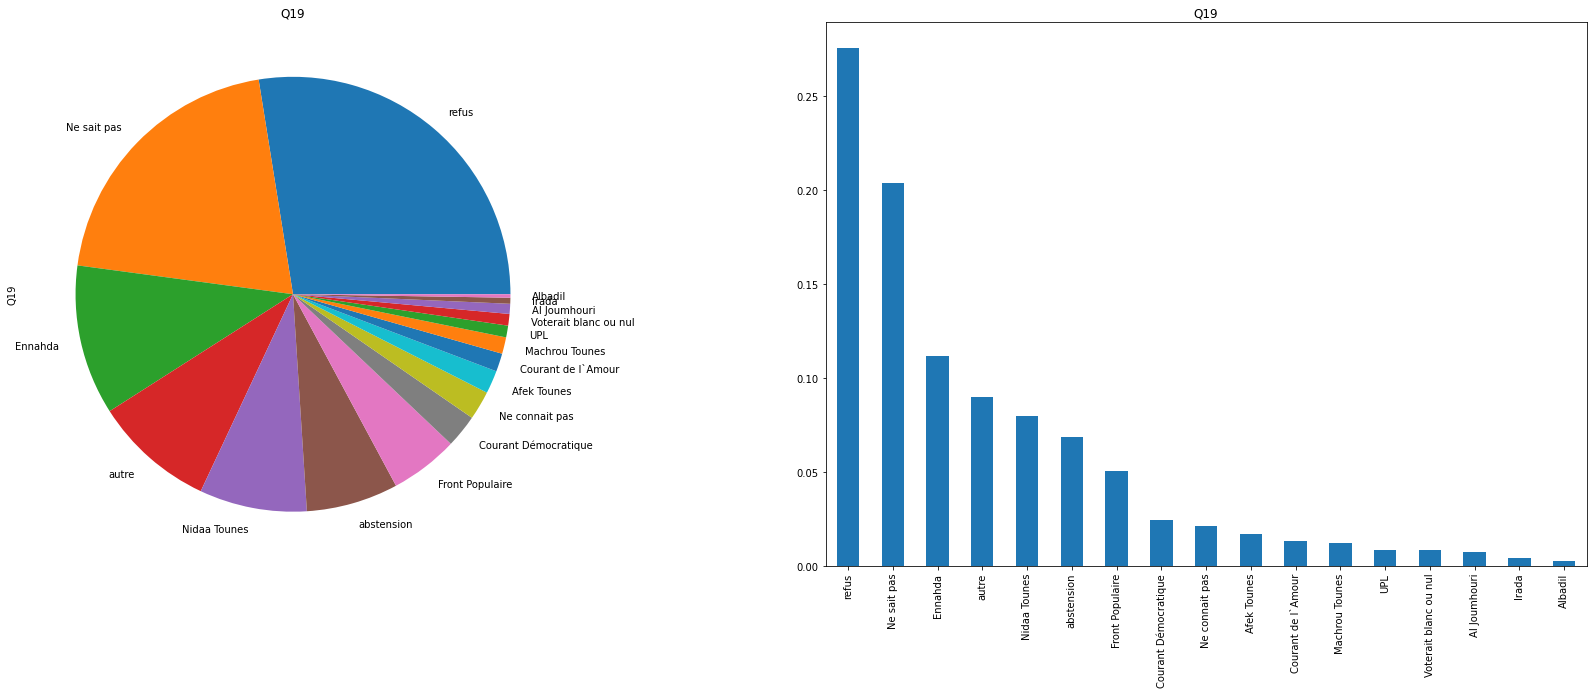

In [ ]:
copy = Base.copy()
varc='Q19'
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l`Amour",11:"Albadil",12:"autre",95:"Voterait blanc ou nul",96:"abstension",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

###  Q20: Imaginons que les élections présidentielles pour élire le président d
république aient lieu dimanche prochain et que vous ayez le choix entre les
personnalités suivantes, pour laquelle y aurait-il le plus de chances que vous votiez ?


refus                2076
Youssef Chahed       1557
Ne sait pas          1466
Moncef Marzouki      1310
Samia Abbou           807
96                    681
Hamma Hammani         653
Beji Caïd Essebsi     586
Mehdi Jomaa           577
Kamel Morjan          359
Mohammed Abbou        309
Rached Ghannouchi     276
Ne connait pas        174
Mohsen Marzouk        123
95                     46
Name: Q20, dtype: int64


Text(0.5, 1.0, 'Q20')

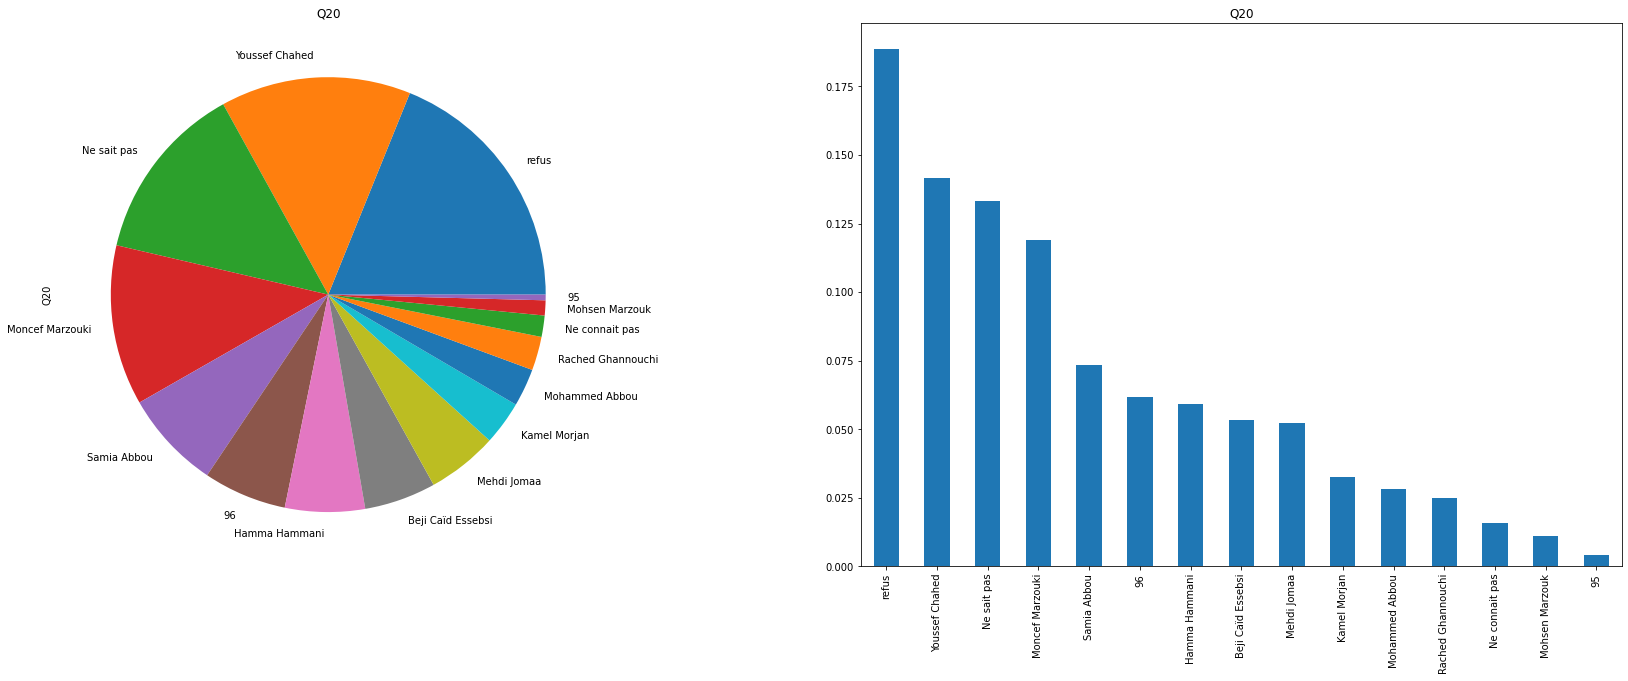

In [ ]:
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

In [ ]:
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,50,75,100])

In [ ]:
Base

,ID,BID,Kish1,Q1,Q2,Q3,Secteur,Block,Q4,Q5,Q6,Q7,Q8,Q8_AUTRES,Q9,Q9_AUTRES,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q19BIS,Q20,Q20BIS,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22_1,...,Q23,Q25,Q26,Q27,Q28A,Q28B,Q30,Q31,Q32_1,Q32_2,Q32_3,Q34_A,Q34_B,Q34_C,Q34_D,Q34_E,Q34_F,Q34_G,Q34_H,Q34_I,Q34_J,Q34_K,Q35_A,Q35_B,Q35_C,Q35_D,Q35_E,Q35_F,Q35_G,Q35_H,Q52,Q53,Q54,Q55,Pondération1,Pondération2,Pondération3,PoidsInitial,Poids,groupe d'age
0,1,1,1,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,27,NaN,1,3.0,NaN,NaN,NaN,3.0,2,1,NaN,1,1,1,4,4,98,NaN,2,2.0,3,1,3,2,2,2,3,2,2,3,2,...,1,2.0,2.0,2.0,4,5.0,6,2,3,6.0,5.0,3,2,3,3,2,2,3,2,2,3,4,2,4,3,2,3,5,2,2,10,1,3,1,1.693877,1.123561,1.033677,478.352606,602.470102,"(25, 50]"
1,2,1,2,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,37,NaN,2,NaN,NaN,4.0,NaN,NaN,2,2,4.0,1,1,1,4,4,1,2.0,8,2.0,2,3,3,2,3,3,3,2,3,3,2,...,1,NaN,NaN,NaN,5,1.0,1,1,3,6.0,4.0,3,3,3,4,2,2,3,2,2,3,4,2,3,3,3,3,3,3,2,4,2,4,3,0.853806,0.645277,0.636774,956.705212,995.519830,"(25, 50]"
2,3,1,2,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,22,NaN,1,2.0,NaN,NaN,NaN,3.0,1,2,4.0,1,1,98,4,3,98,NaN,96,2.0,3,3,99,3,99,99,3,3,99,99,3,...,1,NaN,NaN,NaN,2,10.0,3,3,6,8.0,9.0,3,2,5,4,5,5,4,3,5,5,4,3,3,3,3,3,3,2,2,10,1,6,2,1.849603,1.290227,1.213185,956.705212,1094.787094,"(0, 25]"
3,4,1,3,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,53,NaN,1,3.0,NaN,NaN,NaN,1.0,2,1,NaN,1,98,98,2,4,2,2.0,1,1.0,1,3,3,3,3,3,3,3,3,3,2,...,2,98.0,1.0,98.0,5,98.0,3,5,3,97.0,NaN,1,5,5,5,5,5,5,5,5,5,2,2,2,5,5,2,5,5,5,5,2,4,3,0.855732,0.817558,0.559571,1435.057818,537.636292,"(50, 75]"
4,5,1,3,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,27,NaN,1,2.0,NaN,NaN,NaN,1.0,2,2,4.0,1,1,1,3,4,96,1.0,2,1.0,99,1,2,2,99,99,3,3,99,99,3,...,1,NaN,NaN,NaN,1,9.0,4,5,3,8.0,5.0,4,1,2,4,5,5,4,4,5,5,3,3,3,3,3,5,5,2,5,9,1,4,2,1.693877,1.078874,1.017732,1435.057818,1642.180641,"(25, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,11012,918,2,2,22,Tozeur,EL-Hadher,EL-Hadher 14,2,33,NaN,2,NaN,NaN,4.0,NaN,NaN,2,2,4.0,1,1,98,3,4,98,NaN,8,2.0,3,3,3,3,3,3,3,2,3,3,3,...,98,NaN,NaN,NaN,9,3.0,98,1,96,97.0,NaN,98,5,5,5,5,5,5,98,5,5,5,5,5,5,5,5,5,5,98,2,2,98,3,0.416266,0.318999,0.319190,128.243417,171.101413,"(25, 50]"
10996,11013,918,2,1,22,Tozeur,EL-Hadher,EL-Hadher 14,2,37,NaN,1,6.0,NaN,NaN,NaN,4.0,1,1,NaN,1,1,1,2,4,98,NaN,2,1.0,3,1,3,3,3,3,3,3,3,3,3,...,1,2.0,2.0,97.0,4,3.0,3,5,8,5.0,97.0,4,1,2,4,3,5,3,3,2,2,1,3,3,2,2,2,5,3,3,5,2,6,2,0.165501,0.119520,0.118306,128.243417,155.802661,"(25, 50]"
10997,11014,918,2,2,22,Tozeur,EL-Hadher,EL-Hadher 14,2,58,NaN,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,98,98,4,98,98,NaN,98,NaN,97,97,97,97,97,97,97,97,97,97,97,...,98,98.0,98.0,97.0,1,10.0,98,5,98,NaN,NaN,98,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,1,6,2,0.193485,0.180548,0.173471,128.243417,112.201855,"(50, 75]"
10998,11015,918,3,1,22,Tozeur,EL-Hadher,EL-Hadher 14,2,29,NaN,2,NaN,NaN,1.0,NaN,NaN,2,2,4.0,1,1,98,4,4,97,1.0,97,1.0,3,3,3,3,3,3,3,3,3,3,3,...,1,NaN,NaN,NaN,3,1.0,4,5,3,5.0,8.0,98,5,5,5,5,5,5,98,5,5,1,5,5,5,5,5,5,5,5,4,2,6,2,0.274733,0.205663,0.203525,192.365125,245.871656,"(25, 50]"


In [ ]:
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,50,75,100])
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy.groupby("varc").value_counts



#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

SyntaxError: ignored

### Le pourcentage des gens qui sont enregistrés sur le registre electoral par rapport aux personnes qui ont répondu  

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
set(Base["Q12"])

{1, 2, 98}

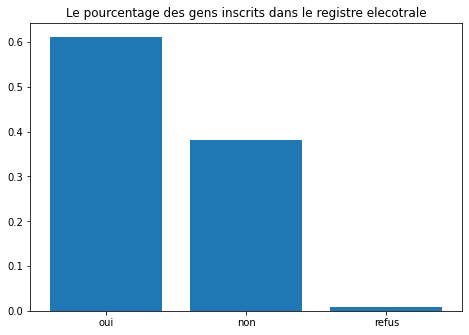

In [ ]:
x=["oui","non","refus"]
y=[Base[Base["Q12"]==1].count()[0],Base[Base["Q12"]==2].count()[0],Base[Base["Q12"]==98].count()[0]]
y=y/sum(y)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.title("Le pourcentage des gens inscrits dans le registre elecotrale")
plt.show()

ISIE a annoncé qu'il y'avait 5,370 millions inscrits dans le registre éléctoral et estime qu'il y'avait 3,489 millions élécteurs potentiels. Ce qui nous donne une probabilté de 0.606. 
Le lien de la source est le suivant: https://www.webmanagercenter.com/2019/04/08/433426/isie-5370-millions-de-tunisiens-inscrits-au-registre-electoral/

### Le pourcentage des gens qui manifestent un interet pour pour la politique

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
set(Base["Q17"])

{1, 2, 3, 4, 99}

In [ ]:
nb_total=Base[~Base['Q17'].isin([99])].count()[0]
p=Base[Base["Q17"].isin([1,2])].count()[0]/nb_total
f=nb_total/11960000
var=(1-f)*p*(1-p)/(nb_total-1)
print("le pourcentage des pesonnes qui manifestent un interet pour la politique est de l'ordre de {}. La variance de l'estimateur est {}".format(p,var))

le pourcentage des pesonnes qui manifestent un interet pour la politique est de l'ordre de 0.4813902572523262. La variance de l'estimateur est 2.2755666098219552e-05


le pourcentage des pesonnes qui manifestent un interet pour la politique est de l'ordre de 48.3% . La variance de l'estimateur est 2.2755666098219552e-05. Ainsi, on presque sur qu'on est proche de la vrai valeur

###Le pourcentage des gens qui sont très intéréssés par la politique

In [ ]:
nb_total=Base[~Base['Q17'].isin([99])].count()[0]
p=Base[Base["Q17"].isin([1])].count()[0]/nb_total
f=nb_total/11960000
var=(1-f)*p*(1-p)/(nb_total-1)
print("le pourcentage des pesonnes qui manifestent un interet pour la politique est de l'ordre de {}. La variance de l'estimateur est {}".format(p,var))

Ici, seulement 12,6% des tunisiens sont très intéressés par la politique (La variance est de l'ordere de 1.0055019385198964e-05)

### Quelle est la catégorie d'age qui manifeste un intéret pour la politique

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")

In [ ]:
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,35,45,55,65,100])
groupes_ages=set(Base["groupe d'age"])
groupes_ages = list(groupes_ages)
couples={}
for i in groupes_ages:
  nb_total=Base[(~Base['Q17'].isin([99]))&(Base["groupe d'age"]==i)].count()[0]
  p=Base[(Base["Q17"].isin([1,2]))&(Base["groupe d'age"]==i)].count()[0]/nb_total
  f=nb_total/11960000
  var=(1-f)*p*(1-p)/(nb_total-1)
  couples[i]=[p,var]
df=pd.DataFrame(couples)
df

On remarque que l'interet à la politque augmente avec l'age des tunisiens. Cela est cohérent avec la réalité. Par exemple la politique est souvent discutées par les personnes agées de plus de 40 ans. 

###Interet par la politque en fonction du status professionnel 

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[copy[varc].isin(["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"])]
df=pd.DataFrame(columns=["statut","interet pour la politiue","count","total"])
for i in statut_prof:
  total=copy[copy[varc]==i].count()[0]
  n=copy[(copy[varc]==i)&((copy["Q17"].isin([1,2])))].count()[0]
  df=df.append({"statut":i,"interet pour la politiue":n/total,"count":n,"total":total},ignore_index=True)
df

D'après les résultats, on voit bien que les gens les moins intéressés par la  politque sont les chomeurs et les personnes actifs.
Cependant les étudiants qui appartiennent à la génération de la révolution sont les personnes les plus intéressés par la politique. 

In [ ]:
Base[Base["Q17"].isin([1])].count()[0]/Base.count()[0]

In [ ]:
Base.count()[0]

In [ ]:
f=11000/11960000
var=(1-f)*p*(1-p)/10999
var

### Le candidat préféré pour chaque groupe d'age

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,35,45,55,65,100])
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["groupe d'age",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["groupe d'age","Q20","ID"])
age_groupe=set(copy["groupe d'age"])
for i in age_groupe:
  tmp=copy.loc[copy["groupe d'age"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df

In [ ]:
df=pd.DataFrame(columns=["groupe d'age","Q20","ID"])
age_groupe=set(copy["groupe d'age"])
for i in age_groupe:
  tmp=copy.loc[copy["groupe d'age"]==i].reset_index()
  print(tmp.iloc[tmp["ID"].idxmax()])
  print(tmp.iloc[tmp["ID"].idxmax()]["groupe d'age"])
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
  

In [ ]:
df=df[["groupe d'age","Q20","ID"]]
df

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")

In [ ]:
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,60,100])

In [ ]:
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["groupe d'age",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["groupe d'age","Q20","ID"])
age_groupe=set(copy["groupe d'age"])
for i in age_groupe:
  tmp=copy.loc[copy["groupe d'age"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df=df[["groupe d'age","Q20","ID"]]
df

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,60,100])
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["groupe d'age",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["groupe d'age","Q20","ID"])
age_groupe=set(copy["groupe d'age"])
for i in age_groupe:
  tmp=copy.loc[copy["groupe d'age"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df=df[["groupe d'age","Q20","ID"]]
df

Ici on remarque que les étudiants vote en général pour Moncef Marzouki Alors que les adultes et les retraités choississent Youssef chahed 

### Candidat préferé par sexe

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["Q1",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q1","Q20","ID"])
sexe=set(copy["Q1"])
for i in sexe:
  tmp=copy.loc[copy["Q1"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df=df[["Q1","Q20","ID"]]
df

###Le candidat préférée par statut professionnel

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Refus de répondre"])]
df=pd.DataFrame()
varc="Q20"
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
copy=copy.groupby(["Q9",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q6","Q20","ID"])
activite=set(copy["Q9"])
for i in activite:
  tmp=copy.loc[copy["Q9"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df=df[["Q9","Q20","ID"]]
df

###Le pourcentage des individus qui connaissent à la fois le président, le 1er ministre et le secrétaire général actuel de l’UGTT 

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
total=copy[(~copy['Q14'].isin([99]))&(~copy['Q15'].isin([99]))&(~copy['Q16'].isin([99]))].count()[0]
n=copy[(copy['Q14'].isin([1]))&(copy['Q15'].isin([1]))&(copy['Q16'].isin([1]))].count()[0] 
print("total:{}, réponse correcte:{}, pourcentage:{}".format(total,n,n/total))

Seulement 45% de la population de la tunisie connaissent les personnent qui dirigent le pays. Ce chiffre est très proche de la valeur estimé des personnes intéressés par la politique. A mon avis, cette valeur est plus fiable puisque le fait de répondre à ces trois est un vrai test de validation des connaissances.

###Partie politique préférée par les tunisiens 

In [ ]:
copy = Base.copy()
varc='Q19'
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l'Amour",11:"Albadil",12:"Autres",95:"Voterait blanc",96:"Abstention",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

###Partie politique préférée par sexe

In [ ]:
set(Base["Q19"].values)

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q19'
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l'Amour",11:"Albadil",12:"Autres",95:"Voterait blanc",96:"Abstention",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["Q1",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q1","Q19","ID"])
sexe=set(copy["Q1"])
for i in sexe:
  tmp=copy.loc[copy["Q1"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df=df[["Q1","Q19","ID"]]
df

###Partie politique préféré par région

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Tunis",2:"Ariana",3:"Ben arous",4:"Mannouba",7:"Nabeul",26:"Nabeul",6:"Bizerte",5:"Zaghouane",8:"Beja",10:"El kef",9:"Jandouba",
      11:"Seliana",15:"Sousse",16:"Monastir",17:"Mehdia",25:"Tunis",18:"Sfax",27:"Sfax",12:"Kairouan",14:"Sidi bouzid",13:"Kasserine",19:"Gabes",
      20:"Mednine",24:"Tataouine",21:"Gafsa",22:"Tozeur",23:"Kebeli"}
varc='Q2'
copy.replace(to_replace={varc: Dict},inplace=True)
varc='Q19'
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l'Amour",11:"Albadil",12:"Autres",95:"Voterait blanc",96:"Abstention",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
copy=copy.groupby(["Q2","Q19"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q2","Q19","ID"])
partie=set(copy["Q2"])
for i in partie:
  tmp=copy.loc[copy["Q2"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q2","Q19","ID"]].reset_index()

On remarque que les villes sur les cotes ont tendance à ne pas voter pour Ennahda. Alors que la majorité des autres villes choississent cette partie politique qui est très répandues chez les habitants de ces régions. Celui-ci est un refelt des différences des mentalités des gens puisque Ennahda représente le courant convervateur.  

###Candidat préferé par région

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Tunis",2:"Ariana",3:"Ben arous",4:"Mannouba",7:"Nabeul",26:"Nabeul",6:"Bizerte",5:"Zaghouane",8:"Beja",10:"El kef",9:"Jandouba",
      11:"Seliana",15:"Sousse",16:"Monastir",17:"Mehdia",25:"Tunis",18:"Sfax",27:"Sfax",12:"Kairouan",14:"Sidi bouzid",13:"Kasserine",19:"Gabes",
      20:"Mednine",24:"Tataouine",21:"Gafsa",22:"Tozeur",23:"Kebeli"}
varc='Q2'
copy.replace(to_replace={varc: Dict},inplace=True)
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
copy=copy.groupby(["Q2","Q20"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q2","Q20","ID"])
partie=set(copy["Q2"])
for i in partie:
  tmp=copy.loc[copy["Q2"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q2","Q20","ID"]].reset_index()

On note pour Sousse et Mehdia une tendance à voter pour le candidat qui est né dans ces villes à savoir Kamel Morjane et Mehdi Jomaa. 
Il est clair que les deux candidats préferés sont Youssef Chahed et ensuite Moncef Marzouki qui vient en deuxième place. 
Le fait que youssef chahed est le favoris vient du fait qu'il etait le premier ministre durant cette période. Donc il avait la meilleure couverture médiatique bien que certains personnes le dénoncent fortement pour des raisons de corruption

###Candidat préferé par Statut professionnel

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[copy[varc].isin(["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"])]
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne sait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["refus"])]
copy=copy.groupby(["Q9","Q20"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q9","Q20","ID"])
partie=set(copy["Q9"])
for i in partie:
  tmp=copy.loc[copy["Q9"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q9","Q20","ID"]].reset_index()

On peut dire pour les chomeurs qui'ils ont choisit pour voter à Moncef Marzouki parce que au contraie de Youssef chahed, Moncef Marzouki n'occupait pas de poste politique. Ainsi on peut dire qu'ils cherchent à faire un changment qui pourra améliorer les

###Partie politique par satut professionnel

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[copy[varc].isin(["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"])]
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l'Amour",11:"Albadil",12:"Autres",95:"Voterait blanc",96:"Abstention",98:"refus",97:"Ne sait pas",99:"Ne sait pas"}
varc="Q19"
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[(~copy[varc].isin(["refus"]))]
copy=copy.groupby(["Q9","Q19"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q9","Q19","ID"])
partie=set(copy["Q9"])
for i in partie:
  tmp=copy.loc[copy["Q9"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q9","Q19","ID"]].reset_index()

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[copy[varc].isin(["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"])]
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l'Amour",11:"Albadil",12:"Autres",95:"Voterait blanc",96:"Abstention",98:"refus",97:"Ne sait pas",99:"Ne sait pas"}
varc="Q19"
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[(~copy[varc].isin(["Ne sait pas","refus"]))]
copy=copy.groupby(["Q9","Q19"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q9","Q19","ID"])
partie=set(copy["Q9"])
for i in partie:
  tmp=copy.loc[copy["Q9"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q9","Q19","ID"]].reset_index()

###Climat social

# **Q28: Parmi les problèmes suivants, lequel correspond le mieux aux préoccupations actuelles  ? Et quel est le deuxième problème qui correspond aux préoccupations actuelles ?** 

La vie coûte trop cher                    4092
Il y a trop de chômage                    2640
On ne peut pas se soigner correctement    1577
Il y a trop d’inégalités sociales          525
-\tIl n’y a pas assez de sécurité          460
Les salaires sont trop bas                 405
Rien de tout cela                          362
Pas de deuxième réponse                    233
Les impôts sont trop élevés                202
Il n’y a rien à faire                      199
Les services publics sont inefficaces      189
refus                                      116
Name: Q28A, dtype: int64


Text(0.5, 1.0, 'Q28A')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


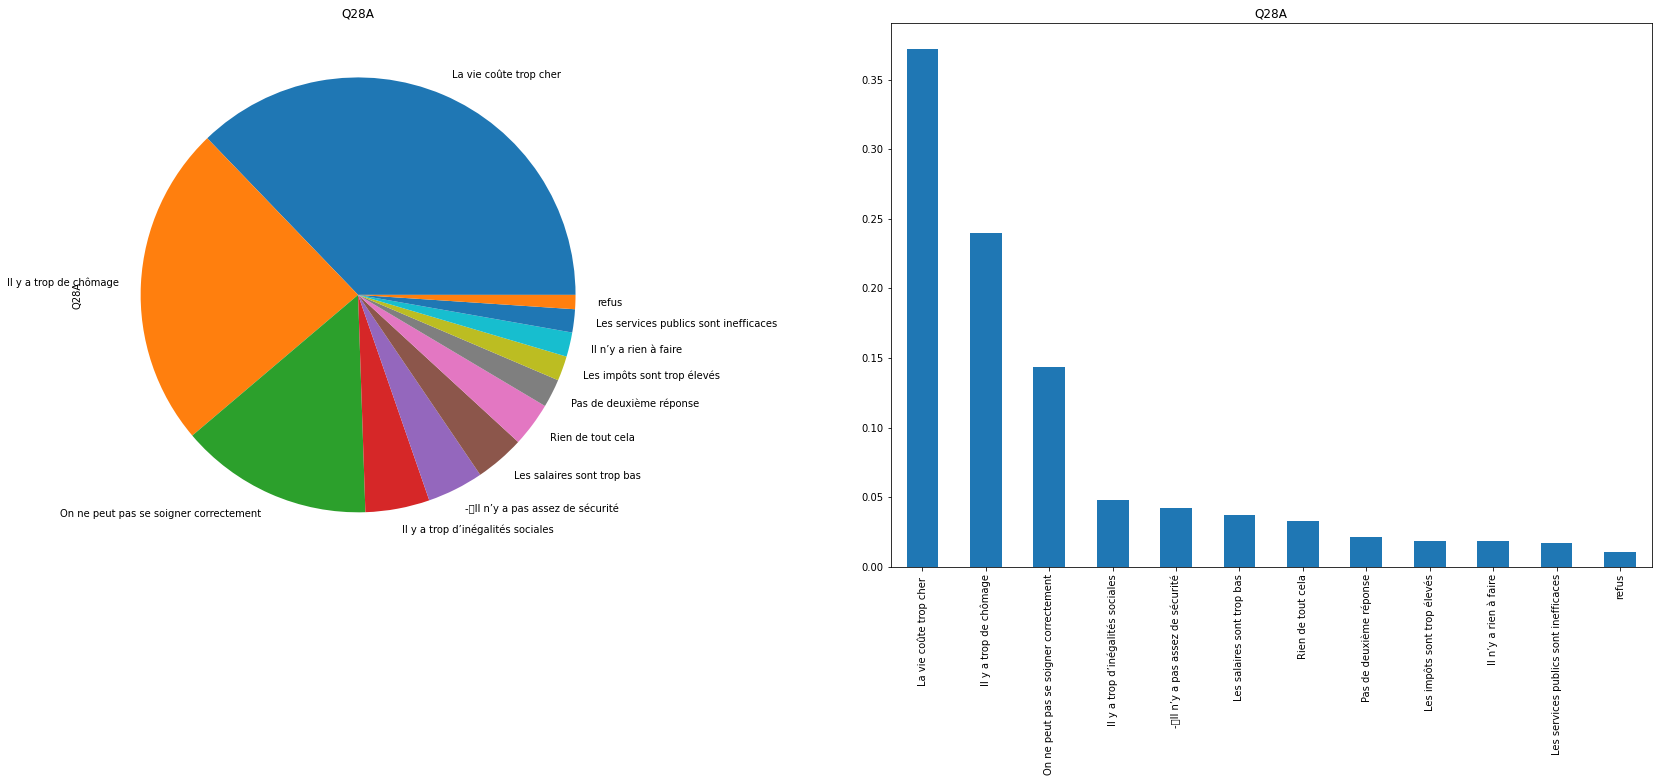

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q28A'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

La vie coûte trop cher                    2970
Il y a trop de chômage                    2486
On ne peut pas se soigner correctement    1011
Rien de tout cela                          660
Les salaires sont trop bas                 627
Il y a trop d’inégalités sociales          588
-\tIl n’y a pas assez de sécurité          576
Ne connait pas                             539
Les impôts sont trop élevés                397
Les services publics sont inefficaces      304
Pas de deuxième réponse                    290
Il n’y a rien à faire                      197
refus                                        6
Name: Q28B, dtype: int64


Text(0.5, 1.0, 'Q28B')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


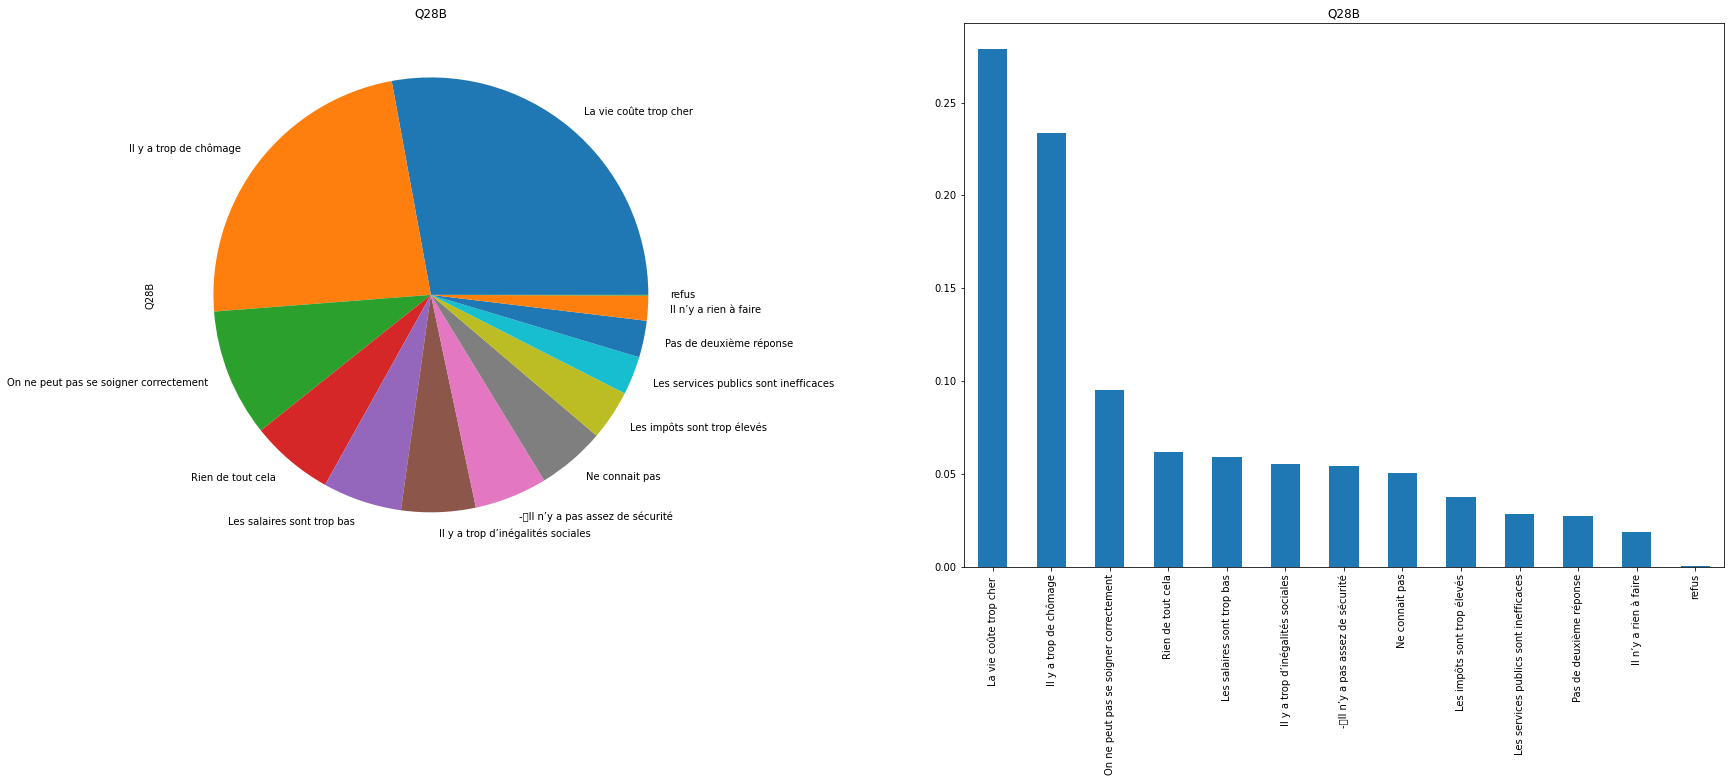

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q28B'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

les premières préoccupations des personnes selon chaque tranche d'age


---



In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,35,45,55,65,100])
copy = Base.copy()
varc='Q28A'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["groupe d'age",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["groupe d'age","Q28A","ID"])
age_groupe=set(copy["groupe d'age"])
for i in age_groupe:
  tmp=copy.loc[copy["groupe d'age"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df

,groupe d'age,Q28A,ID,index
4,"(45, 55]",La vie coûte trop cher,740,34.0
4,"(35, 45]",La vie coûte trop cher,1143,24.0
4,"(25, 35]",La vie coûte trop cher,822,14.0
4,"(65, 100]",La vie coûte trop cher,373,54.0
4,"(55, 65]",La vie coûte trop cher,536,44.0
2,"(0, 25]",Il y a trop de chômage,488,2.0


les deuxièmes préoccupations des personnes selon la tranche d'age

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,35,45,55,65,100])
copy = Base.copy()
varc='Q28B'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["groupe d'age",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["groupe d'age","Q28B","ID"])
age_groupe=set(copy["groupe d'age"])
for i in age_groupe:
  tmp=copy.loc[copy["groupe d'age"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df

,groupe d'age,Q28B,ID,index
4,"(45, 55]",La vie coûte trop cher,597,34.0
4,"(35, 45]",La vie coûte trop cher,683,24.0
4,"(25, 35]",La vie coûte trop cher,623,14.0
4,"(65, 100]",La vie coûte trop cher,238,54.0
4,"(55, 65]",La vie coûte trop cher,417,44.0
2,"(0, 25]",Il y a trop de chômage,399,2.0


préoccupations des personnes selon le sexe

In [ ]:
set(Base["Q28A"].values)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 97, 99}

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q28A'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["Q1",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q1","Q28A","ID"])
sexe=set(copy["Q1"])
for i in sexe:
  tmp=copy.loc[copy["Q1"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df=df[["Q1","Q28A","ID"]]
df

,Q1,Q28A,ID
4,1,La vie coûte trop cher,1694
4,2,La vie coûte trop cher,2398


Préoccupations des personnes selon la région

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Tunis",2:"Ariana",3:"Ben arous",4:"Mannouba",7:"Nabeul",26:"Nabeul",6:"Bizerte",5:"Zaghouane",8:"Beja",10:"El kef",9:"Jandouba",
      11:"Seliana",15:"Sousse",16:"Monastir",17:"Mehdia",25:"Tunis",18:"Sfax",27:"Sfax",12:"Kairouan",14:"Sidi bouzid",13:"Kasserine",19:"Gabes",
      20:"Mednine",24:"Tataouine",21:"Gafsa",22:"Tozeur",23:"Kebeli"}
varc='Q2'
copy.replace(to_replace={varc: Dict},inplace=True)
varc='Q28A'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
copy=copy.groupby(["Q2","Q28A"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q2","Q28A","ID"])
partie=set(copy["Q2"])
for i in partie:
  tmp=copy.loc[copy["Q2"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q2","Q28A","ID"]].reset_index()

,index,Q2,Q28A,ID
0,4,Tunis,La vie coûte trop cher,328
1,4,Sidi bouzid,La vie coûte trop cher,148
2,2,Jandouba,Il y a trop de chômage,143
3,4,Ben arous,La vie coûte trop cher,139
4,4,Zaghouane,La vie coûte trop cher,171
5,4,Kasserine,La vie coûte trop cher,148
6,4,Mannouba,La vie coûte trop cher,139
7,4,Monastir,La vie coûte trop cher,134
8,4,Mehdia,La vie coûte trop cher,162
9,4,Beja,La vie coûte trop cher,143


In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Tunis",2:"Ariana",3:"Ben arous",4:"Mannouba",7:"Nabeul",26:"Nabeul",6:"Bizerte",5:"Zaghouane",8:"Beja",10:"El kef",9:"Jandouba",
      11:"Seliana",15:"Sousse",16:"Monastir",17:"Mehdia",25:"Tunis",18:"Sfax",27:"Sfax",12:"Kairouan",14:"Sidi bouzid",13:"Kasserine",19:"Gabes",
      20:"Mednine",24:"Tataouine",21:"Gafsa",22:"Tozeur",23:"Kebeli"}
varc='Q2'
copy.replace(to_replace={varc: Dict},inplace=True)
varc='Q28B'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
copy=copy.groupby(["Q2","Q28B"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q2","Q28B","ID"])
partie=set(copy["Q2"])
for i in partie:
  tmp=copy.loc[copy["Q2"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q2","Q28B","ID"]].reset_index()

,index,Q2,Q28B,ID
0,4,Tunis,La vie coûte trop cher,195
1,2,Sidi bouzid,Il y a trop de chômage,103
2,4,Jandouba,La vie coûte trop cher,132
3,4,Ben arous,La vie coûte trop cher,94
4,4,Zaghouane,La vie coûte trop cher,118
5,4,Kasserine,La vie coûte trop cher,122
6,4,Mannouba,La vie coûte trop cher,103
7,4,Monastir,La vie coûte trop cher,107
8,4,Mehdia,La vie coûte trop cher,110
9,4,Beja,La vie coûte trop cher,111


Préoccupations par statut professionnel

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[copy[varc].isin(["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"])]
varc='Q28A'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
copy=copy.groupby(["Q9","Q28A"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q9","Q28A","ID"])
partie=set(copy["Q9"])
for i in partie:
  tmp=copy.loc[copy["Q9"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q9","Q28A","ID"]].reset_index()

,index,Q9,Q28A,ID
0,2,Actif/je travaille,Il y a trop de chômage,647
1,4,retraité,La vie coûte trop cher,1717
2,2,Chômeur,Il y a trop de chômage,154
3,4,Etudiant,La vie coûte trop cher,279
4,3,Femme au foyer,La vie coûte trop cher,47


In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[copy[varc].isin(["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"])]
varc='Q28B'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
copy=copy.groupby(["Q9","Q28B"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q9","Q28B","ID"])
partie=set(copy["Q9"])
for i in partie:
  tmp=copy.loc[copy["Q9"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q9","Q28B","ID"]].reset_index()

,index,Q9,Q28B,ID
0,4,Actif/je travaille,La vie coûte trop cher,546
1,4,retraité,La vie coûte trop cher,1071
2,2,Chômeur,Il y a trop de chômage,144
3,4,Etudiant,La vie coûte trop cher,217
4,4,Femme au foyer,La vie coûte trop cher,30


# ***Q30: Quelle est la vraie division qui existe dans le pays ?***

In [ ]:
set(Base["Q30"].values)

{1, 2, 3, 4, 5, 6, 95, 98, 99}

Division entre les pauvres et les riches                              3862
Division entre la société et la classe politique                      2152
Ne connait pas                                                        1727
Division entre les régions de l'intérieur et les régions côtières     1047
Division entre le nord et le sud du pays                               806
Division entre les conservateurs et les modernistes                    557
Division entre les jeunes et les vieux                                 414
\tPas de division                                                      398
refus                                                                   37
Name: Q30, dtype: int64


Text(0.5, 1.0, 'Q30')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


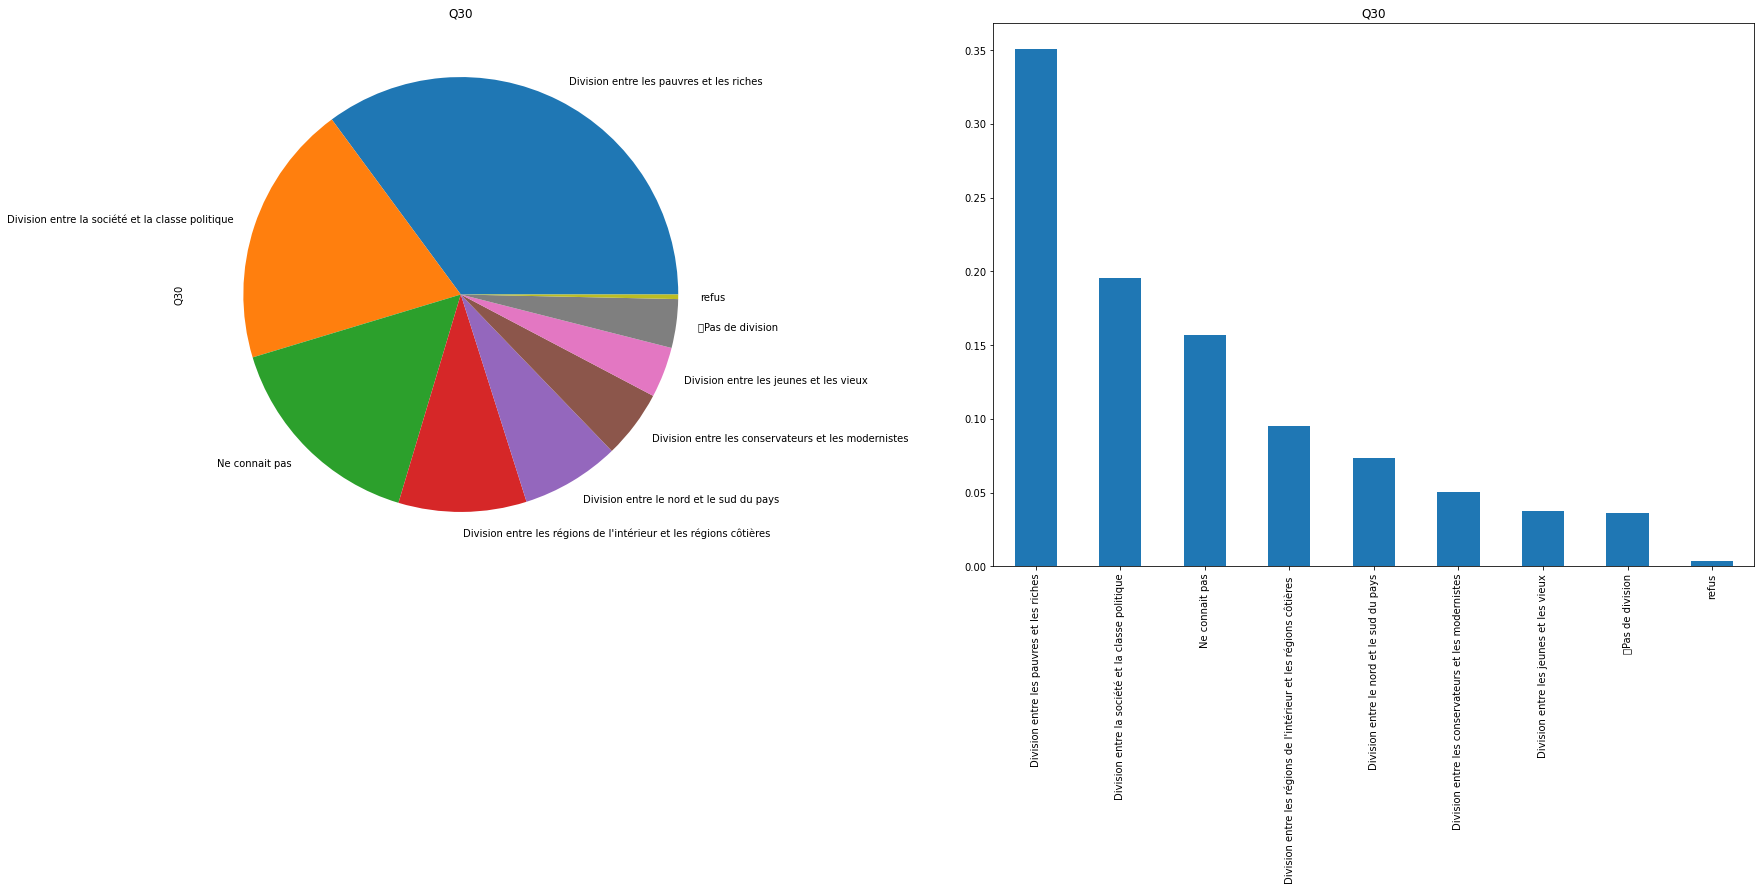

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q30'
Dict={1:"Division entre les régions de l'intérieur et les régions côtières ",2:"Division entre le nord et le sud du pays",3:"Division entre les pauvres et les riches",4:"Division entre la société et la classe politique",5:"Division entre les jeunes et les vieux",6:"Division entre les conservateurs et les modernistes",95:"	Pas de division",
      99:"refus",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

la division existente selon les tranches d'age

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,35,45,55,65,100])
copy = Base.copy()
varc='Q30'
Dict={1:"Division entre les régions de l'intérieur et les régions côtières ",2:"Division entre le nord et le sud du pays",3:"Division entre les pauvres et les riches",4:"Division entre la société et la classe politique",5:"Division entre les jeunes et les vieux",6:"Division entre les conservateurs et les modernistes",95:"	Pas de division",
      99:"refus",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne connait pas","refus"])]
df=pd.DataFrame()
copy=copy.groupby(["groupe d'age",varc]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["groupe d'age","Q30","ID"])
age_groupe=set(copy["groupe d'age"])
for i in age_groupe:
  tmp=copy.loc[copy["groupe d'age"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df

,groupe d'age,Q30,ID,index
5,"(45, 55]",Division entre les pauvres et les riches,675,26.0
5,"(35, 45]",Division entre les pauvres et les riches,945,19.0
5,"(25, 35]",Division entre les pauvres et les riches,840,12.0
5,"(65, 100]",Division entre les pauvres et les riches,246,40.0
5,"(55, 65]",Division entre les pauvres et les riches,490,33.0
5,"(0, 25]",Division entre les pauvres et les riches,639,5.0


La division existente selon le profil professionnel

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Actif/je travaille",2:"Chômeur",3:"Etudiant",4:"retraité",5:"Femme au foyer",6:"Handicapé",7:"Autres",96:"Refus",98:"Refus",99:"Refus"}
varc='Q9'
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[copy[varc].isin(["Actif/je travaille","Chômeur","Etudiant","retraité","Femme au foyer","Handicapé"])]
varc='Q30'
Dict={1:"Division entre les régions de l'intérieur et les régions côtières ",2:"Division entre le nord et le sud du pays",3:"Division entre les pauvres et les riches",4:"Division entre la société et la classe politique",5:"Division entre les jeunes et les vieux",6:"Division entre les conservateurs et les modernistes",95:"	Pas de division",
      99:"refus",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne connait pas","refus"])]
copy=copy.groupby(["Q9","Q30"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q9","Q30","ID"])
partie=set(copy["Q9"])
for i in partie:
  tmp=copy.loc[copy["Q9"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q9","Q30","ID"]].reset_index()

,index,Q9,Q30,ID
0,5,Actif/je travaille,Division entre les pauvres et les riches,712
1,5,retraité,Division entre les pauvres et les riches,1407
2,5,Chômeur,Division entre les pauvres et les riches,184
3,5,Etudiant,Division entre les pauvres et les riches,255
4,5,Femme au foyer,Division entre les pauvres et les riches,36


La division existente selon la region

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
Dict={1:"Tunis",2:"Ariana",3:"Ben arous",4:"Mannouba",7:"Nabeul",26:"Nabeul",6:"Bizerte",5:"Zaghouane",8:"Beja",10:"El kef",9:"Jandouba",
      11:"Seliana",15:"Sousse",16:"Monastir",17:"Mehdia",25:"Tunis",18:"Sfax",27:"Sfax",12:"Kairouan",14:"Sidi bouzid",13:"Kasserine",19:"Gabes",
      20:"Mednine",24:"Tataouine",21:"Gafsa",22:"Tozeur",23:"Kebeli"}
varc='Q2'
copy.replace(to_replace={varc: Dict},inplace=True)
varc='Q30'
Dict={1:"Division entre les régions de l'intérieur et les régions côtières ",2:"Division entre le nord et le sud du pays",3:"Division entre les pauvres et les riches",4:"Division entre la société et la classe politique",5:"Division entre les jeunes et les vieux",6:"Division entre les conservateurs et les modernistes",95:"	Pas de division",
      99:"refus",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne connait pas","refus"])]
copy=copy.groupby(["Q2","Q30"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q2","Q30","ID"])
partie=set(copy["Q2"])
for i in partie:
  tmp=copy.loc[copy["Q2"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q2","Q30","ID"]].reset_index()

,index,Q2,Q30,ID
0,5,Tunis,Division entre les pauvres et les riches,343
1,5,Sidi bouzid,Division entre les pauvres et les riches,132
2,5,Jandouba,Division entre les pauvres et les riches,136
3,5,Ben arous,Division entre les pauvres et les riches,157
4,5,Zaghouane,Division entre les pauvres et les riches,178
5,5,Kasserine,Division entre les pauvres et les riches,127
6,5,Mannouba,Division entre les pauvres et les riches,154
7,5,Monastir,Division entre les pauvres et les riches,114
8,5,Mehdia,Division entre les pauvres et les riches,143
9,5,Beja,Division entre les pauvres et les riches,148


# ***Coorélation entre les préoccupations actuelles et les choix de parties politiques***

Choix des préoccupations selon la partie politique

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q19'
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l`Amour",11:"Albadil",12:"autre",95:"Voterait blanc ou nul",96:"abstension",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)

varc='Q28A'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
copy=copy.groupby(["Q19","Q28A"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q19","Q28A","ID"])
partie=set(copy["Q19"])
for i in partie:
  tmp=copy.loc[copy["Q19"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q19","Q28A","ID"]].reset_index()

,index,Q19,Q28A,ID
0,4,Afek Tounes,La vie coûte trop cher,75
1,4,abstension,La vie coûte trop cher,229
2,4,Nidaa Tounes,La vie coûte trop cher,363
3,4,Voterait blanc ou nul,La vie coûte trop cher,27
4,5,Albadil,On ne peut pas se soigner correctement,9
5,4,Ennahda,La vie coûte trop cher,443
6,4,refus,La vie coûte trop cher,1248
7,8,Courant Démocratique,On ne peut pas se soigner correctement,93
8,2,Al Joumhouri,Il y a trop de chômage,26
9,4,Courant de l`Amour,La vie coûte trop cher,50


Effet des préoccupations sur le choix de partie

In [ ]:
Base=pd.read_excel("/content/Base.xlsx")
copy = Base.copy()
varc='Q19'
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l`Amour",11:"Albadil",12:"autre",95:"Voterait blanc ou nul",96:"abstension",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Ne sait pas","Ne connait pas","refus"])]
varc='Q28A'
Dict={1:"La vie coûte trop cher ",2:"Les impôts sont trop élevés",3:"Il y a trop de chômage",4:"Il y a trop d’inégalités sociales",5:"-	Il n’y a pas assez de sécurité",6:"Les services publics sont inefficaces",7:"Il n’y a rien à faire",8:"Les salaires sont trop bas",9:"On ne peut pas se soigner correctement",
      10:"Rien de tout cela",99:"refus",97:"Pas de deuxième réponse",98:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
copy=copy[~copy[varc].isin(["Pas de deuxième réponse","Ne connait pas","refus"])]
copy=copy.groupby(["Q28A","Q19"]).agg({"ID":"count"}).reset_index()
df=pd.DataFrame(columns=["Q28A","Q19","ID"])
partie=set(copy["Q28A"])
for i in partie:
  tmp=copy.loc[copy["Q28A"]==i].reset_index()
  df=df.append(tmp.iloc[tmp["ID"].idxmax()])
df[["Q28A","Q19","ID"]].reset_index()

,index,Q28A,Q19,ID
0,12,Les services publics sont inefficaces,autre,25
1,4,Rien de tout cela,Ennahda,32
2,11,Les salaires sont trop bas,autre,39
3,5,On ne peut pas se soigner correctement,Ennahda,252
4,12,-\tIl n’y a pas assez de sécurité,abstension,54
5,5,Il y a trop d’inégalités sociales,Ennahda,70
6,3,Les impôts sont trop élevés,Ennahda,26
7,5,Il y a trop de chômage,Ennahda,262
8,5,La vie coûte trop cher,Ennahda,443
9,5,Il n’y a rien à faire,Front Populaire,21


# ***Machine learrning***

In [19]:
Base2.head()

,ID,Q36_1. Créer des emplois en licenciant et en remplaçant les fonctionnaires absentéistes.,Q36_2. L’Etat finance aujourd’hui un seul syndicat : l’UGTT. l’Etat veut s’arrêter de financer l’UGTT êtes-vous…,Q36_3. L’Etat finance aujourd’hui un seul syndicat : l’UGTT. Voulez-vous que l’Etat finance également les autres syndicats tels que UTT et CGTT?,Q36_4. Transformer les peines pour délits mineurs en travaux d’intérêt général.,Q36_5. Supprimer l’immunité parlementaire.,Q36_6. Créer 200 000 emplois dans le secteur public,Q36_7. Inscrire les noms des personnes condamnées pour corruption dans un fichier national accessible à tous.,Q36_8. Exclure à vie des rangs de la fonction publique les fonctionnaires corrompus,Q36_9. Considérer les injures régionalistes comme des crimes racistes passibles de 1 an de prison,Q36_10. Faire intervenir l'armée pour redémarrer la production de phosphate quand elle est bloquée par des grèves sauvages/illégales,"Q36_11. Toute agression (braquage, harcèlement, etc.) à main armée sera jugée et puni comme une tentative de meurtre","Q36_12. Pour les auteurs d’attentats terroristes (en Tunisie ou en Syrie), êtes-vous favorable à des programmes de rééducation pour permettre leur réinsertion dans la société ?","Q36_13. Pour les auteurs d’attentats terroristes (en Tunisie ou en Syrie), êtes-vous favorable à l’application de la peine de mort ?","Q36_14. Pour les auteurs d’attentats terroristes (en Tunisie ou en Syrie), êtes-vous favorable à la prison à vie ?",Q36_15. Autoriser la possession de fusils de chasse par les tunisiens habitant dans les zones d’activité des terroristes.,Q36_16. Instaurer une taxe annuelle mondiale sur tous les tunisiens résidents à l’étranger,Q36_17. Suspendre et priver de salaire pendant un an tout fonctionnaire absent de manière injustifiée de son poste de travail,Q36_18. Supprimer les avantages des fonctionnaires,"Q36_19. Quand 20% des citoyens le demandent, un référendum est organisé pour décider si on dissout ou pas l'Assemblée des représentants du peuple",Q36_20. Aider les chômeurs des régions de l’intérieur à aller vers les régions côtières où il y a de l’emploi.,Q36_21. Tester si des agents publics sont corruptibles avec de faux corrupteurs employés par l’État.,Q36_22. Octroyer des titres de propriétés aux petits commerces qui n’en ont pas dans les quartiers défavorisés pour les sortir de l’illégalité,Q36_23. Créer un tribunal populaire composé de citoyens tirés au sort pour juger les crimes de corruption,"Q36_24. Prison ferme pour toute atteinte physique sur un fonctionnaire de l'État (médecins, instituteurs, etc.)",Q36_25. Confier à la brigade anti-terroriste la lutte contre les braquages et les violences urbaines,Q36_26. Imposer à 80% tous les revenus supérieurs à 20 000 dinars par mois,Q36_27. La présentation aux élections législatives et présidentielles de candidats de l’Ugtt,Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes,Q36_29. Le jugement des cadres d’Ennahdha en relation avec l’affaire de l’organisation secrète,Q36_30. L’augmentation des salaires des fonctionnaires voulue par l’UGTT,Q36_31. Transformation du régime parlementaire en régime présidentiel,Q36_32. La privatisation des entreprises publiques,Q36_33. La grève des enseignements (que les profs boycottent les examens).,Q36_34. La suppression des 7adhayer,Q36_35. Réquisitionner le parc automobile de l'État pour assurer le transport dans les régions et les quartiers enclavés,Q36_36. La classe moyenne paiera moins d'impôts grâce à la suppression des aides sociales,"Q36_C. Si le maire ne prend pas la décision de démolition de cafés et de magasins qui exploitaient illégalement les trottoirs, quelles sont les mesures à mettre en œuvre ?","Q36_D. Selon vous, quelles sont les mesures à mettre en œuvre dans les situations suivantes : Un policier qui demande un bakchich","Q36_E. Selon vous, quelles sont les mesures à mettre en œuvre dans les situations suivantes : Un fonctionnaire qui d

In [20]:
sum(list(Base2['ID']-Base['ID']))

0

Les Id sont identiques dans les deux base.

In [21]:
Base2.drop(['ID'],axis=1,inplace=True)

In [22]:
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l`Amour",11:"Albadil",12:"autre",95:"Voterait blanc ou nul",96:"abstension",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}

In [23]:
Base2.replace(1,-2,inplace=True)
Base2.replace(2,-1,inplace=True)
Base2.replace(3,1,inplace=True)
Base2.replace(4,2,inplace=True)
Base2.replace(98,0,inplace=True)

In [24]:
#one-versus-the-rest approach 
Base2['target']=Base["Q19"]
partie_politique=2#changer la partie politique ici
def funt(i):
  if i ==partie_politique:
    i=1
  else:
    i=0
  return(i)
Base2['target'] = [funt(i) for i in Base2["target"]]

In [25]:
Base2.groupby("target").count()

,Q36_1. Créer des emplois en licenciant et en remplaçant les fonctionnaires absentéistes.,Q36_2. L’Etat finance aujourd’hui un seul syndicat : l’UGTT. l’Etat veut s’arrêter de financer l’UGTT êtes-vous…,Q36_3. L’Etat finance aujourd’hui un seul syndicat : l’UGTT. Voulez-vous que l’Etat finance également les autres syndicats tels que UTT et CGTT?,Q36_4. Transformer les peines pour délits mineurs en travaux d’intérêt général.,Q36_5. Supprimer l’immunité parlementaire.,Q36_6. Créer 200 000 emplois dans le secteur public,Q36_7. Inscrire les noms des personnes condamnées pour corruption dans un fichier national accessible à tous.,Q36_8. Exclure à vie des rangs de la fonction publique les fonctionnaires corrompus,Q36_9. Considérer les injures régionalistes comme des crimes racistes passibles de 1 an de prison,Q36_10. Faire intervenir l'armée pour redémarrer la production de phosphate quand elle est bloquée par des grèves sauvages/illégales,"Q36_11. Toute agression (braquage, harcèlement, etc.) à main armée sera jugée et puni comme une tentative de meurtre","Q36_12. Pour les auteurs d’attentats terroristes (en Tunisie ou en Syrie), êtes-vous favorable à des programmes de rééducation pour permettre leur réinsertion dans la société ?","Q36_13. Pour les auteurs d’attentats terroristes (en Tunisie ou en Syrie), êtes-vous favorable à l’application de la peine de mort ?","Q36_14. Pour les auteurs d’attentats terroristes (en Tunisie ou en Syrie), êtes-vous favorable à la prison à vie ?",Q36_15. Autoriser la possession de fusils de chasse par les tunisiens habitant dans les zones d’activité des terroristes.,Q36_16. Instaurer une taxe annuelle mondiale sur tous les tunisiens résidents à l’étranger,Q36_17. Suspendre et priver de salaire pendant un an tout fonctionnaire absent de manière injustifiée de son poste de travail,Q36_18. Supprimer les avantages des fonctionnaires,"Q36_19. Quand 20% des citoyens le demandent, un référendum est organisé pour décider si on dissout ou pas l'Assemblée des représentants du peuple",Q36_20. Aider les chômeurs des régions de l’intérieur à aller vers les régions côtières où il y a de l’emploi.,Q36_21. Tester si des agents publics sont corruptibles avec de faux corrupteurs employés par l’État.,Q36_22. Octroyer des titres de propriétés aux petits commerces qui n’en ont pas dans les quartiers défavorisés pour les sortir de l’illégalité,Q36_23. Créer un tribunal populaire composé de citoyens tirés au sort pour juger les crimes de corruption,"Q36_24. Prison ferme pour toute atteinte physique sur un fonctionnaire de l'État (médecins, instituteurs, etc.)",Q36_25. Confier à la brigade anti-terroriste la lutte contre les braquages et les violences urbaines,Q36_26. Imposer à 80% tous les revenus supérieurs à 20 000 dinars par mois,Q36_27. La présentation aux élections législatives et présidentielles de candidats de l’Ugtt,Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes,Q36_29. Le jugement des cadres d’Ennahdha en relation avec l’affaire de l’organisation secrète,Q36_30. L’augmentation des salaires des fonctionnaires voulue par l’UGTT,Q36_31. Transformation du régime parlementaire en régime présidentiel,Q36_32. La privatisation des entreprises publiques,Q36_33. La grève des enseignements (que les profs boycottent les examens).,Q36_34. La suppression des 7adhayer,Q36_35. Réquisitionner le parc automobile de l'État pour assurer le transport dans les régions et les quartiers enclavés,Q36_36. La classe moyenne paiera moins d'impôts grâce à la suppression des aides sociales,"Q36_C. Si le maire ne prend pas la décision de démolition de cafés et de magasins qui exploitaient illégalement les trottoirs, quelles sont les mesures à mettre en œuvre ?","Q36_D. Selon vous, quelles sont les mesures à mettre en œuvre dans les situations suivantes : Un policier qui demande un bakchich","Q36_E. Selon vous, quelles sont les mesures à mettre en œuvre dans les situations suivantes : Un fonctionnaire qui dema

on remarque que les deux classes sont inbalanced ce qui logique puisque il sagit des élections pour eviter que l'argorithme balance toujours vers la classe majoritaire on utilise la méthode d'upsampling

**upsampling**

In [26]:
df_majority=Base2[Base2.target==0]
df_minority=Base2[Base2.target==1]
df_minority_upsampled=resample(df_minority,replace=True,n_samples=9000,random_state=42)
Base3=pd.concat([df_majority,df_minority_upsampled])
Base2=Base3

In [28]:
Base2.groupby("target").count()

,Q36_1. Créer des emplois en licenciant et en remplaçant les fonctionnaires absentéistes.,Q36_2. L’Etat finance aujourd’hui un seul syndicat : l’UGTT. l’Etat veut s’arrêter de financer l’UGTT êtes-vous…,Q36_3. L’Etat finance aujourd’hui un seul syndicat : l’UGTT. Voulez-vous que l’Etat finance également les autres syndicats tels que UTT et CGTT?,Q36_4. Transformer les peines pour délits mineurs en travaux d’intérêt général.,Q36_5. Supprimer l’immunité parlementaire.,Q36_6. Créer 200 000 emplois dans le secteur public,Q36_7. Inscrire les noms des personnes condamnées pour corruption dans un fichier national accessible à tous.,Q36_8. Exclure à vie des rangs de la fonction publique les fonctionnaires corrompus,Q36_9. Considérer les injures régionalistes comme des crimes racistes passibles de 1 an de prison,Q36_10. Faire intervenir l'armée pour redémarrer la production de phosphate quand elle est bloquée par des grèves sauvages/illégales,"Q36_11. Toute agression (braquage, harcèlement, etc.) à main armée sera jugée et puni comme une tentative de meurtre","Q36_12. Pour les auteurs d’attentats terroristes (en Tunisie ou en Syrie), êtes-vous favorable à des programmes de rééducation pour permettre leur réinsertion dans la société ?","Q36_13. Pour les auteurs d’attentats terroristes (en Tunisie ou en Syrie), êtes-vous favorable à l’application de la peine de mort ?","Q36_14. Pour les auteurs d’attentats terroristes (en Tunisie ou en Syrie), êtes-vous favorable à la prison à vie ?",Q36_15. Autoriser la possession de fusils de chasse par les tunisiens habitant dans les zones d’activité des terroristes.,Q36_16. Instaurer une taxe annuelle mondiale sur tous les tunisiens résidents à l’étranger,Q36_17. Suspendre et priver de salaire pendant un an tout fonctionnaire absent de manière injustifiée de son poste de travail,Q36_18. Supprimer les avantages des fonctionnaires,"Q36_19. Quand 20% des citoyens le demandent, un référendum est organisé pour décider si on dissout ou pas l'Assemblée des représentants du peuple",Q36_20. Aider les chômeurs des régions de l’intérieur à aller vers les régions côtières où il y a de l’emploi.,Q36_21. Tester si des agents publics sont corruptibles avec de faux corrupteurs employés par l’État.,Q36_22. Octroyer des titres de propriétés aux petits commerces qui n’en ont pas dans les quartiers défavorisés pour les sortir de l’illégalité,Q36_23. Créer un tribunal populaire composé de citoyens tirés au sort pour juger les crimes de corruption,"Q36_24. Prison ferme pour toute atteinte physique sur un fonctionnaire de l'État (médecins, instituteurs, etc.)",Q36_25. Confier à la brigade anti-terroriste la lutte contre les braquages et les violences urbaines,Q36_26. Imposer à 80% tous les revenus supérieurs à 20 000 dinars par mois,Q36_27. La présentation aux élections législatives et présidentielles de candidats de l’Ugtt,Q36_28. L’instauration de l’égalité dans l’héritage entre les hommes et les femmes,Q36_29. Le jugement des cadres d’Ennahdha en relation avec l’affaire de l’organisation secrète,Q36_30. L’augmentation des salaires des fonctionnaires voulue par l’UGTT,Q36_31. Transformation du régime parlementaire en régime présidentiel,Q36_32. La privatisation des entreprises publiques,Q36_33. La grève des enseignements (que les profs boycottent les examens).,Q36_34. La suppression des 7adhayer,Q36_35. Réquisitionner le parc automobile de l'État pour assurer le transport dans les régions et les quartiers enclavés,Q36_36. La classe moyenne paiera moins d'impôts grâce à la suppression des aides sociales,"Q36_C. Si le maire ne prend pas la décision de démolition de cafés et de magasins qui exploitaient illégalement les trottoirs, quelles sont les mesures à mettre en œuvre ?","Q36_D. Selon vous, quelles sont les mesures à mettre en œuvre dans les situations suivantes : Un policier qui demande un bakchich","Q36_E. Selon vous, quelles sont les mesures à mettre en œuvre dans les situations suivantes : Un fonctionnaire qui dema

on remarque que les deux classes sont balancées

In [ ]:
#Thelist=list(Base2.columns)
#Thelist.remove('target')

In [ ]:

#for j in Thelist:
#  l1=[0]* len(Base2[j])
#  l2=[0]*len(Base2[j])
#  l3=[0]*len(Base2[j])
#  for i in range(len(Base2[j])):  
#    if Base2[j][i] == 1 or Base2[j][i]==2:
#      l1[i]=0
#      l2[i]=1
#      l3[i]=0
#    elif Base2[j][i]==3 or Base2[j][i]==4:
#      l1[i]=1
#      l2[i]=0
#      l3[i]=0
#    else:
#      l1[i]=0
#      l2[i]=0
#      l3[i]=1
#  Base2[j+"for"]=l1
#  Base2[j+"not_for"]=l2
#  Base2[j+"no_answer"]=l3
#Base2.drop(Thelist,axis=1,inplace=True)



In [29]:
train,test = train_test_split(Base2, test_size = 0.2, random_state =42)

In [30]:
x_train=train.drop(['target'],axis=1)
y_train=train['target']
x_test=test.drop(['target'],axis=1)
y_test=test['target']

**SGD Classifier tuning**

In [31]:
pipeline = Pipeline([
    ('clf', SGDClassifier()),
])


parameters = {
    #'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
     'clf__max_iter': (10, 50, 80),
}

if __name__ == "__main__":

    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1,scoring="accuracy")

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(x_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (10, 50, 80),
 'clf__penalty': ('l2', 'elasticnet')}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.7s finished


done in 7.158s

Best score: 0.552
Best parameters set:
	clf__alpha: 1e-06
	clf__max_iter: 80
	clf__penalty: 'elasticnet'


In [32]:
sgd=SGDClassifier(alpha=1e-05,max_iter=10,penalty="elasticnet")
sgd.fit(x_train, y_train)
cv_scores = cross_val_score(sgd, x_train, y_train, cv=5, scoring='accuracy')
cv_scores.mean()

0.5179125135849503

Text(0.5, 257.44, 'Predicted label')

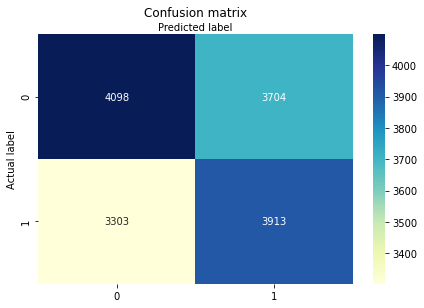

In [33]:
y_pred=sgd.predict(x_train)
cnf_matrix = metrics.confusion_matrix(y_train,y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
y_pred=sgd.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.5241011984021305

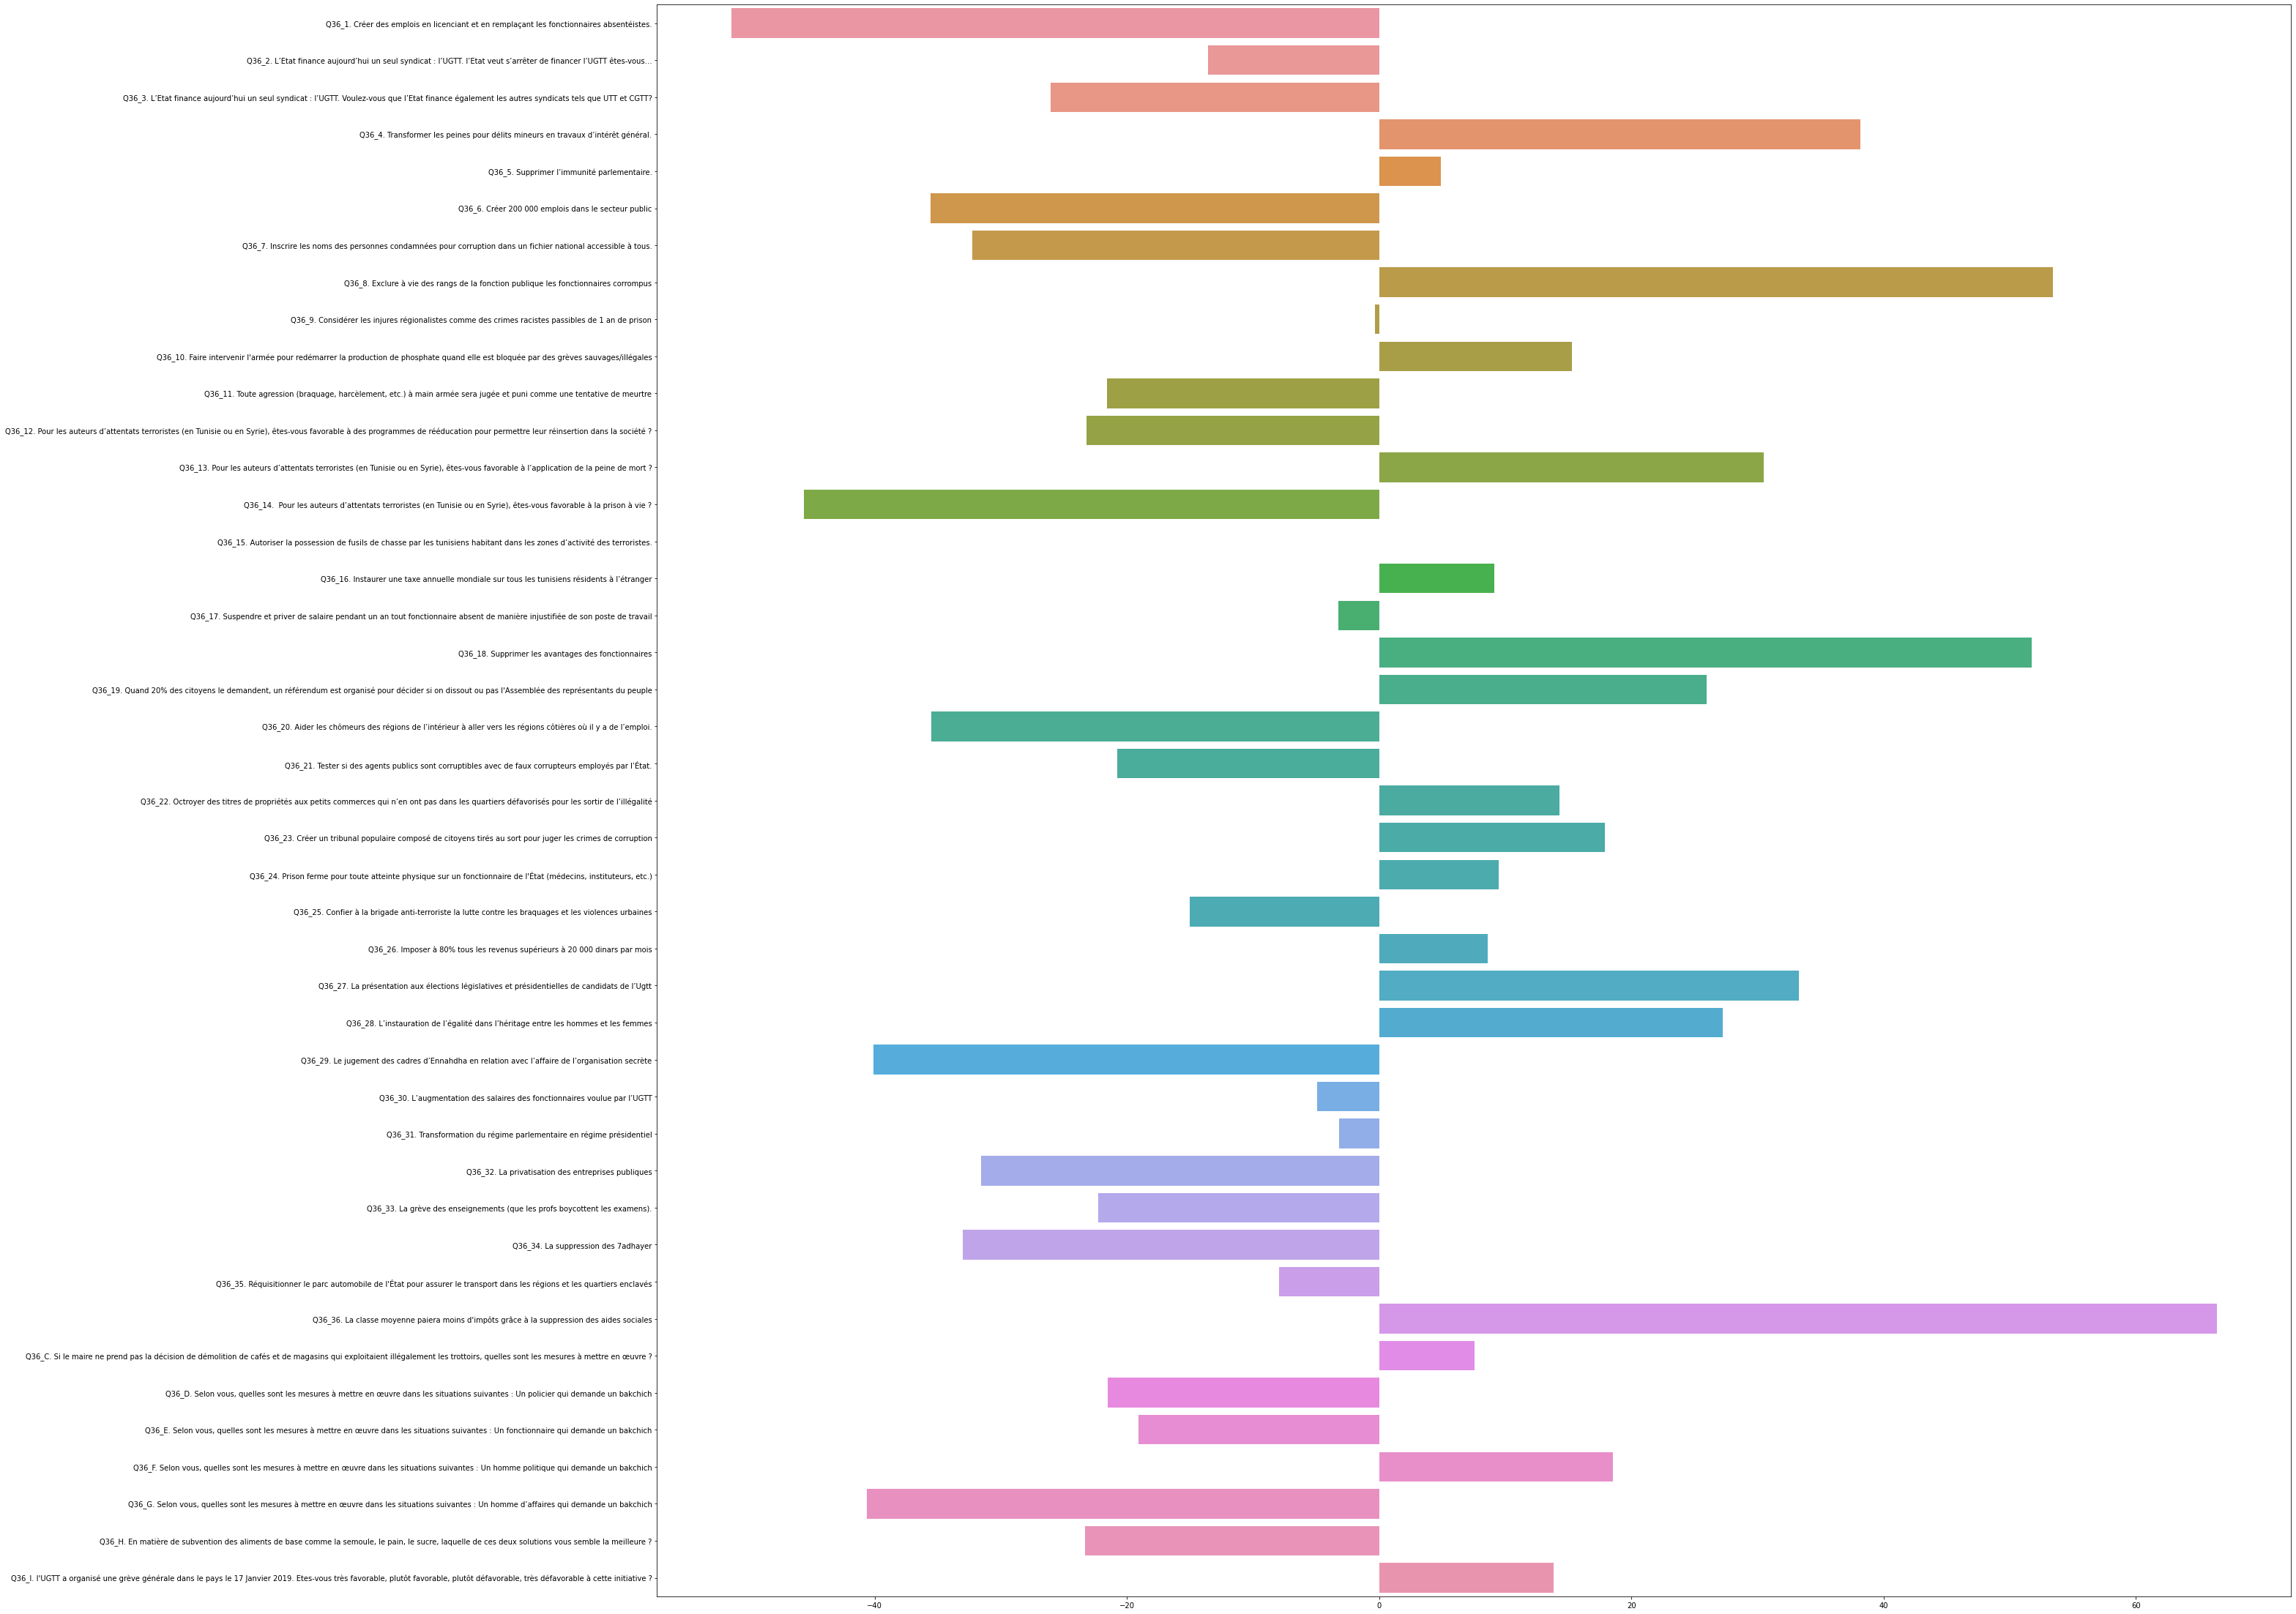

In [35]:
importance = sgd.coef_[0]#Weights assigned to the features.
imp=np.zeros(len(importance))
#plot feature importance
for i,v in enumerate(importance):
  imp[i]='%.5f' % (v)
fig_dims = (40, 40)
fig, ax = plt.subplots(figsize=fig_dims) 
ax = sns.barplot(x=imp, y=list(x_train.columns),ax=ax)

**RFECV for sgd**

In [36]:
sgd=SGDClassifier(alpha=1e-05,max_iter=50,penalty="l2")
cv_selector = RFECV(sgd,cv= 5, step=1,scoring="accuracy")
cv_selector = cv_selector.fit(x_train, y_train)
rfecv_mask = cv_selector.get_support() #list of booleans

In [37]:
rfecv_features = [] 
for bool, feature in zip(rfecv_mask, x_train.columns):
 if bool:
   rfecv_features.append(feature)
print("Optimal number of features :", cv_selector.n_features_)
print("Best features :", rfecv_features)

Optimal number of features : 9
Best features : ['Q36_1. Créer des emplois en licenciant et en remplaçant les fonctionnaires absentéistes.', 'Q36_3. L’Etat finance aujourd’hui un seul syndicat : l’UGTT. Voulez-vous que l’Etat finance également les autres syndicats tels que UTT et CGTT?', 'Q36_8. Exclure à vie des rangs de la fonction publique les fonctionnaires corrompus', 'Q36_11. Toute agression (braquage, harcèlement, etc.) à main armée sera jugée et puni comme une tentative de meurtre', 'Q36_20. Aider les chômeurs des régions de l’intérieur à aller vers les régions côtières où il y a de l’emploi.', "Q36_24. Prison ferme pour toute atteinte physique sur un fonctionnaire de l'État (médecins, instituteurs, etc.)", 'Q36_31. Transformation du régime parlementaire en régime présidentiel', 'Q36_34. La suppression des 7adhayer', 'Q36_H. En matière de subvention des aliments de base comme la semoule, le pain, le sucre, laquelle de ces deux solutions vous semble la meilleure ?']


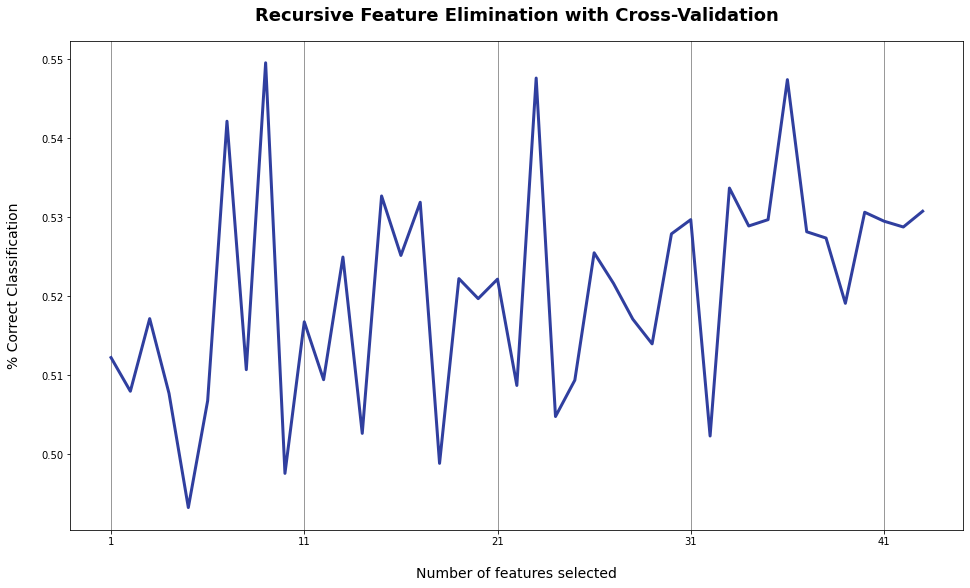

In [38]:

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(cv_selector.grid_scores_) + 1), cv_selector.grid_scores_, color='#303F9F', linewidth=3)
plt.xticks(range(1, len(cv_selector.grid_scores_) + 1,10))
plt.grid(True, axis = 'x', color = 'gray', zorder = 0)
plt.show()

**Random forest tuning**

In [39]:
pipeline = Pipeline([
    ('clf', RandomForestClassifier()),
])


parameters = {
    'clf__criterion': ('gini','entropy'),
    'clf__n_estimators': (100,150,200),
    'clf__max_features': ('auto', 'sqrt', 'log2'),
 
}

if __name__ == "__main__":

    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1,scoring="accuracy")

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(x_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))


Performing grid search...
pipeline: ['clf']
parameters:
{'clf__criterion': ('gini', 'entropy'),
 'clf__max_features': ('auto', 'sqrt', 'log2'),
 'clf__n_estimators': (100, 150, 200)}
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.5min finished


done in 152.226s

Best score: 0.990
Best parameters set:
	clf__criterion: 'gini'
	clf__max_features: 'log2'
	clf__n_estimators: 200


In [40]:
rf=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=150)
rf.fit(x_train, y_train)
cv_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')
cv_scores.mean()

0.9904114970692868

In [41]:
y_pred=rf.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.996537949400799

Text(0.5, 257.44, 'Predicted label')

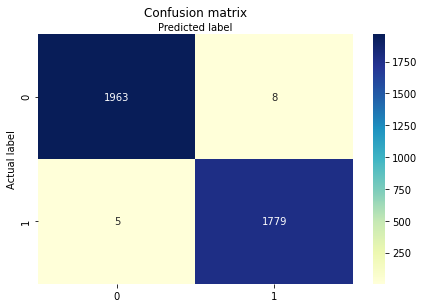

In [42]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**rfecv Random Forest**

In [43]:
rf = RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=150)
rf.fit(x_train, y_train)
cv_selector = RFECV(rf,cv= 2, step=1,scoring="accuracy")
cv_selector = cv_selector.fit(x_train, y_train)
rfecv_mask = cv_selector.get_support() #list of booleans
rfecv_features = [] 
for bool, feature in zip(rfecv_mask, x_train.columns):
 if bool:
  rfecv_features.append(feature)
print("Optimal number of features :", cv_selector.n_features_)
print("Best features :", rfecv_features)

Optimal number of features : 42
Best features : ['Q36_1. Créer des emplois en licenciant et en remplaçant les fonctionnaires absentéistes.', 'Q36_2. L’Etat finance aujourd’hui un seul syndicat : l’UGTT. l’Etat veut s’arrêter de financer l’UGTT êtes-vous…', 'Q36_3. L’Etat finance aujourd’hui un seul syndicat : l’UGTT. Voulez-vous que l’Etat finance également les autres syndicats tels que UTT et CGTT?', 'Q36_4. Transformer les peines pour délits mineurs en travaux d’intérêt général.', 'Q36_5. Supprimer l’immunité parlementaire.', 'Q36_6. Créer 200 000 emplois dans le secteur public', 'Q36_7. Inscrire les noms des personnes condamnées pour corruption dans un fichier national accessible à tous.', 'Q36_8. Exclure à vie des rangs de la fonction publique les fonctionnaires corrompus', 'Q36_9. Considérer les injures régionalistes comme des crimes racistes passibles de 1 an de prison', "Q36_10. Faire intervenir l'armée pour redémarrer la production de phosphate quand elle est bloquée par des gr

In [44]:
rf_features = rfecv_features
x_train_rf=x_train.filter(rf_features,axis=1)
rf=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=200)
rf.fit(x_train_rf, y_train)
cv_scores = cross_val_score(rf, x_train_rf, y_train, cv=5, scoring='accuracy')
cv_scores.mean()

0.9899453852849327

In [45]:
x_test_rf=x_test.filter(rf_features,axis=1)
y_pred=rf.predict(x_test_rf)
metrics.accuracy_score(y_test,y_pred)

0.996005326231691

**SVM tuning**

In [46]:
pipeline = Pipeline([
    ('clf', SVC()),
])


parameters = {
    #'clf__C': (0.1, 1, 10),
    #'clf__gamma': (1, 0.1),
    'clf__kernel': ('linear', 'poly', 'rbf'),
 
}

if __name__ == "__main__":

    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1,scoring="accuracy")

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(x_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['clf']
parameters:
{'clf__kernel': ('linear', 'poly', 'rbf')}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 19.6min finished


done in 1194.421s

Best score: 0.650
Best parameters set:
	clf__kernel: 'rbf'


In [47]:
svm=SVC(kernel="rbf")
svm.fit(x_train, y_train)
cv_scores = cross_val_score(svm, x_train, y_train, cv=5, scoring='accuracy')
cv_scores.mean()

0.6499537080762113

In [48]:
y_pred=svm.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.6484687083888149

**Decision Tree**

In [49]:
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier()),
])


parameters = {
    'clf__criterion': ('gini','entropy'),
    'clf__splitter': ('best', 'random'),
    'clf__max_depth': (None,5,10,15,20,30),
    'clf__max_features': ('auto','sqrt','log2'),
 
}

if __name__ == "__main__":

    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1,scoring="accuracy")

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(x_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['clf']
parameters:
{'clf__criterion': ('gini', 'entropy'),
 'clf__max_depth': (None, 5, 10, 15, 20, 30),
 'clf__max_features': ('auto', 'sqrt', 'log2'),
 'clf__splitter': ('best', 'random')}
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    4.0s


done in 6.029s

Best score: 0.918
Best parameters set:
	clf__criterion: 'gini'
	clf__max_depth: 30
	clf__max_features: 'log2'
	clf__splitter: 'best'


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    6.0s finished


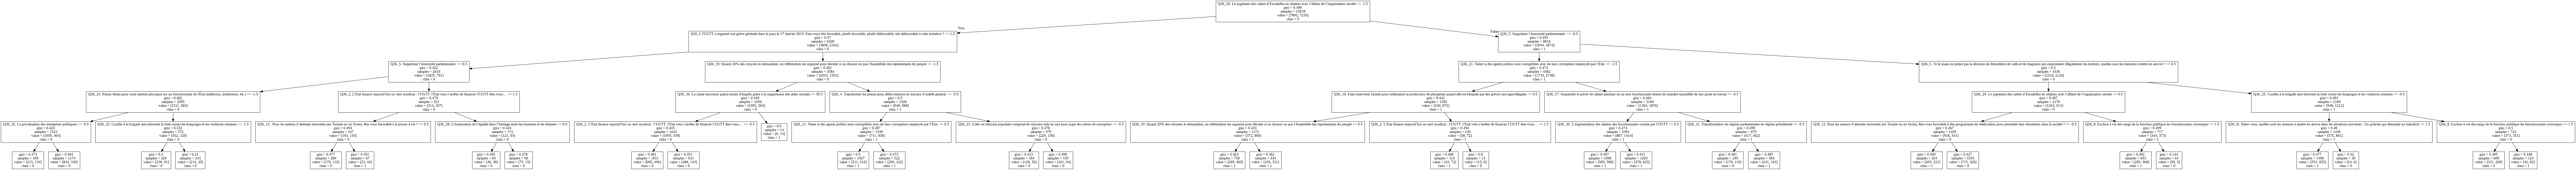

In [50]:
import pydotplus
from IPython.display import Image
from sklearn import tree
mytree=DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='sqrt',splitter='best')
mytree.fit(x_train, y_train)
dot_data=tree.export_graphviz(mytree,out_file=None,feature_names=x_train.columns,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())